In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import multiprocessing
from multiprocessing import Pool
import os

import matplotlib.colors as colors
import matplotlib as mpl  # Add this line

rgb=([112,115,115])
rgb=np.array(rgb)/255.0
icmap=colors.ListedColormap(rgb,name='my_color')
cmap=mpl.cm.viridis

cmap_color=icmap  
# bound=[1E-4,10E-4,25E-4,50e-4,100E-4,150E-4,200E-4,250e-4]
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255 # By Nick
# colors = np.array([[112,115,115],[137,209,201], [18,78,120], [242,187,5],[215,78,9],[255,16,7]])/255

In [438]:
PR = 10
file  = "/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/HSt42_10_6hourly_CC_OK/RH80_PR10_20000day_startfrom_19900day_final.dat"
u_file  = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_daily.dat"
v_file  = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/v/PR{PR}_500_20000day_v_daily.dat"


ds                = h5py.File(u_file, "r")
u                 = np.asarray(ds["u"][-500:,:,:,:])

ds                = h5py.File(v_file, "r")
v                 = np.asarray(ds["v"][-500:,:,:,:])
print(u.shape)

# ds                = h5py.File(file, "r")

# u                 = np.asarray(ds["grid_u_c_xyzt"])
# v                 = np.asarray(ds["grid_v_c_xyzt"])
# spe_vor_final_xyz = np.asarray(ds["spe_vor_c_xyzt"])
# grid_t_c_xyzt     = np.asarray(ds["grid_t_c_xyzt"])
# # grid_t_eq_xyzt    = np.asarray(ds["grid_t_eq_xyzt"])
# grid_p_full_xyzt  = np.asarray(ds["grid_p_full_xyzt"])
# print(ds.keys())
# qv                = np.asarray(ds["grid_tracers_c_xyzt"])
# grid_t_c_xyzt     = np.asarray(ds["grid_t_c_xyzt"])

# qv_diff    = np.asarray(ds["grid_tracers_diff_xyzt"])

# PR = 10
# prec_file_path = "/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF" + f"/PR{PR}/prec/PR{PR}_500_20000day_6hourly_prec.dat"
# with h5py.File(prec_file_path, 'r') as file:
#         prec = np.asarray(file['prec'][:, :, :])
# print(qv_diff.shape)
# print(np.nanmax(qv_diff))

(500, 20, 64, 128)


In [439]:
prec_file  = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/prec/PR{PR}_500_20000day_prec_daily.dat"
ds                = h5py.File(prec_file, "r")
prec              = np.asarray(ds["prec"][-500:,:,:])

t_file  = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/t/PR{PR}_500_20000day_t_daily.dat"
ds                = h5py.File(t_file, "r")
temp              = np.asarray(ds["t"][-500:,:,:])

In [440]:
qv_file  = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/qv/PR{PR}_500_20000day_qv_daily.dat"
ds                = h5py.File(qv_file, "r")
qv              = np.asarray(ds["qv"][-500:,:,:])

In [441]:
to = 500
k = 0.5*(v**2+ u**2)
print(k[:,10].min(),k[:,10].max()) 

print(k[:,6].min(),k[:,6].max()) 
print(k[:,5].min(),k[:,5].max()) 
print(k[:,4].min(),k[:,4].max()) 
print(k[:,3].min(),k[:,3].max()) 

# print(k.shape)
x = np.linspace(-180,180,128)
y = np.linspace(-90, 90,64)
xx, yy = np.meshgrid(x, y)
savepath = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/113-1Seminar_fig/Basic_var/PR{PR}"


from PIL import Image

def plot_all(t):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12), dpi=300.)

    mpl.rcParams['axes.linewidth'] = 3

    fig.suptitle(f"L = {PR * 0.01}: Day {t}", fontsize=28)
    if PR == 50:
        cs0 = ax[0, 0].contourf(xx, yy, k[t, 4,:,:], levels=np.linspace(0, 4000, 9), extend='max')
    else:
        cs0 = ax[0, 0].contourf(xx, yy, k[t, 4,:,:], levels=np.linspace(0, 4000, 9), extend='max')
        
    fig.colorbar(cs0, orientation='horizontal', ax=ax[0,0])
    ax[0, 0].set_title(f"KE at Jet center level", fontsize=20)
    
    cs1 = ax[0, 1].contourf(xx, yy, prec[t] * 86400, levels=np.arange(0, 20, 2), extend='max')
    fig.colorbar(cs1, orientation='horizontal', ax=ax[0,1])
    ax[0, 1].set_title(f"Precipitation", fontsize=20)
    
    cs2 = ax[1, 0].contourf(xx, yy, qv[t,18], levels=np.linspace(0.0018,0.022,11), extend='both')
    fig.colorbar(cs2, orientation='horizontal',ax=ax[1,0])
    ax[1, 0].set_title(f"qv at sfc", fontsize=20)
    
    cs3 = ax[1, 1].contourf(xx, yy, temp[t, 18], levels=np.arange(265, 305, 2), extend='both')
    fig.colorbar(cs3, orientation='horizontal', ax=ax[1,1]) 
    ax[1, 1].set_title(f"T at sfc", fontsize=20)
    
    for i in range(2):
        for j in range(2):
            ax[i, j].set_xlabel("Longitude", fontsize=18)
            ax[i, j].set_ylabel("Latitude", fontsize=18)
            ax[i, j].tick_params(axis='x', labelsize=14)
            ax[i, j].tick_params(axis='y', labelsize=14)
    
    plt.tight_layout()

    # Save the image
    image_path = f"{savepath}/{t}.png"
    plt.savefig(image_path, bbox_inches='tight', dpi=300.)
    plt.close()
    # plt.show()

    # Resize the image to make dimensions divisible by 2
    img = Image.open(image_path)
    width, height = img.size
    new_width = width - (width % 2)
    new_height = height - (height % 2)
    img = img.resize((new_width, new_height), Image.LANCZOS)
    img.save(image_path)



6.370092e-07 2487.68
3.2042026e-05 6042.2944
3.9395336e-06 6458.137
9.530057e-06 6499.4365
4.1074956e-05 4598.263


In [398]:
for i in range(to+1):
    plot_all(i)
print("over")

In [442]:
leap = 1
nProc = int(multiprocessing.cpu_count() // 2)
with Pool(nProc) as p:
    results = [p.apply_async(plot_all, (t, )) for t in range(0, to, leap)]
    final = [result.get() for result in results]
!cd $savepath && ffmpeg -r 5 -i %d.png -pix_fmt yuv420p 10.mp4 -y

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 12.4.0 (conda-forge gcc 12.4.0-0)
  configuration: --prefix=/home/PeterChang/miniconda3/envs/ML22 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enabl

In [23]:
prec.shape

(1000, 64, 128)

In [165]:
import matplotlib as mpl

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

# Define the list of PR values to loop through
# PR_values = [0, 10, 20, 30, 40, 50]
PR_values = [0, 10, 20, 30, 40, 50]


# Loop over each PR value
for PR in PR_values:
    # File path for each PR value
    qv_diff_file  = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/qv_diff/PR{PR}_500_20000day_qv_diff_daily.dat"
    
    # Open the file and load the data
    with h5py.File(qv_diff_file, "r") as ds:
        qv_diff = np.asarray(ds["qv_diff"][:1000,:,:,:])
    
    # Calculate the zonal mean
    qv_diff_zonal_mean = np.mean(qv_diff, axis=3)
    
    # Define the vertical (sigma) and latitudinal (y) coordinates
    sigma_onlyz = np.linspace(0,1,20)
    y = np.linspace(-90,90,64)
    
    # Create the meshgrid for plotting
    yy, sigma = np.meshgrid(y, sigma_onlyz)
    
    # Plotting
    plt.figure(figsize=(6,4.5), dpi=300)
    plt.contourf(yy, sigma, qv_diff_zonal_mean.mean(axis=0) * 2.5E6 / 1004 * PR * 0.01, levels=np.linspace(0, 1E-5, 21), extend="max")
    plt.ylim([1, 0])
    plt.title(f"LH feedback: L = {PR / 100}", fontsize=16)
    plt.xlabel("Latitude", fontsize=12)
    plt.ylabel(r"$\sigma$", fontsize=12)
    plt.colorbar()
    plt.tight_layout()
    
    # Create the output directory if it doesn't exist
    output_dir = "LH_feedback"
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the figure
    # plt.show()
    plt.savefig(f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/113-1Seminar_fig/{output_dir}/PR{PR}.png", bbox_inches='tight', dpi=300)
    plt.close()

print("Plots generated for all PR values.")


Plots generated for all PR values.


In [164]:
import matplotlib as mpl


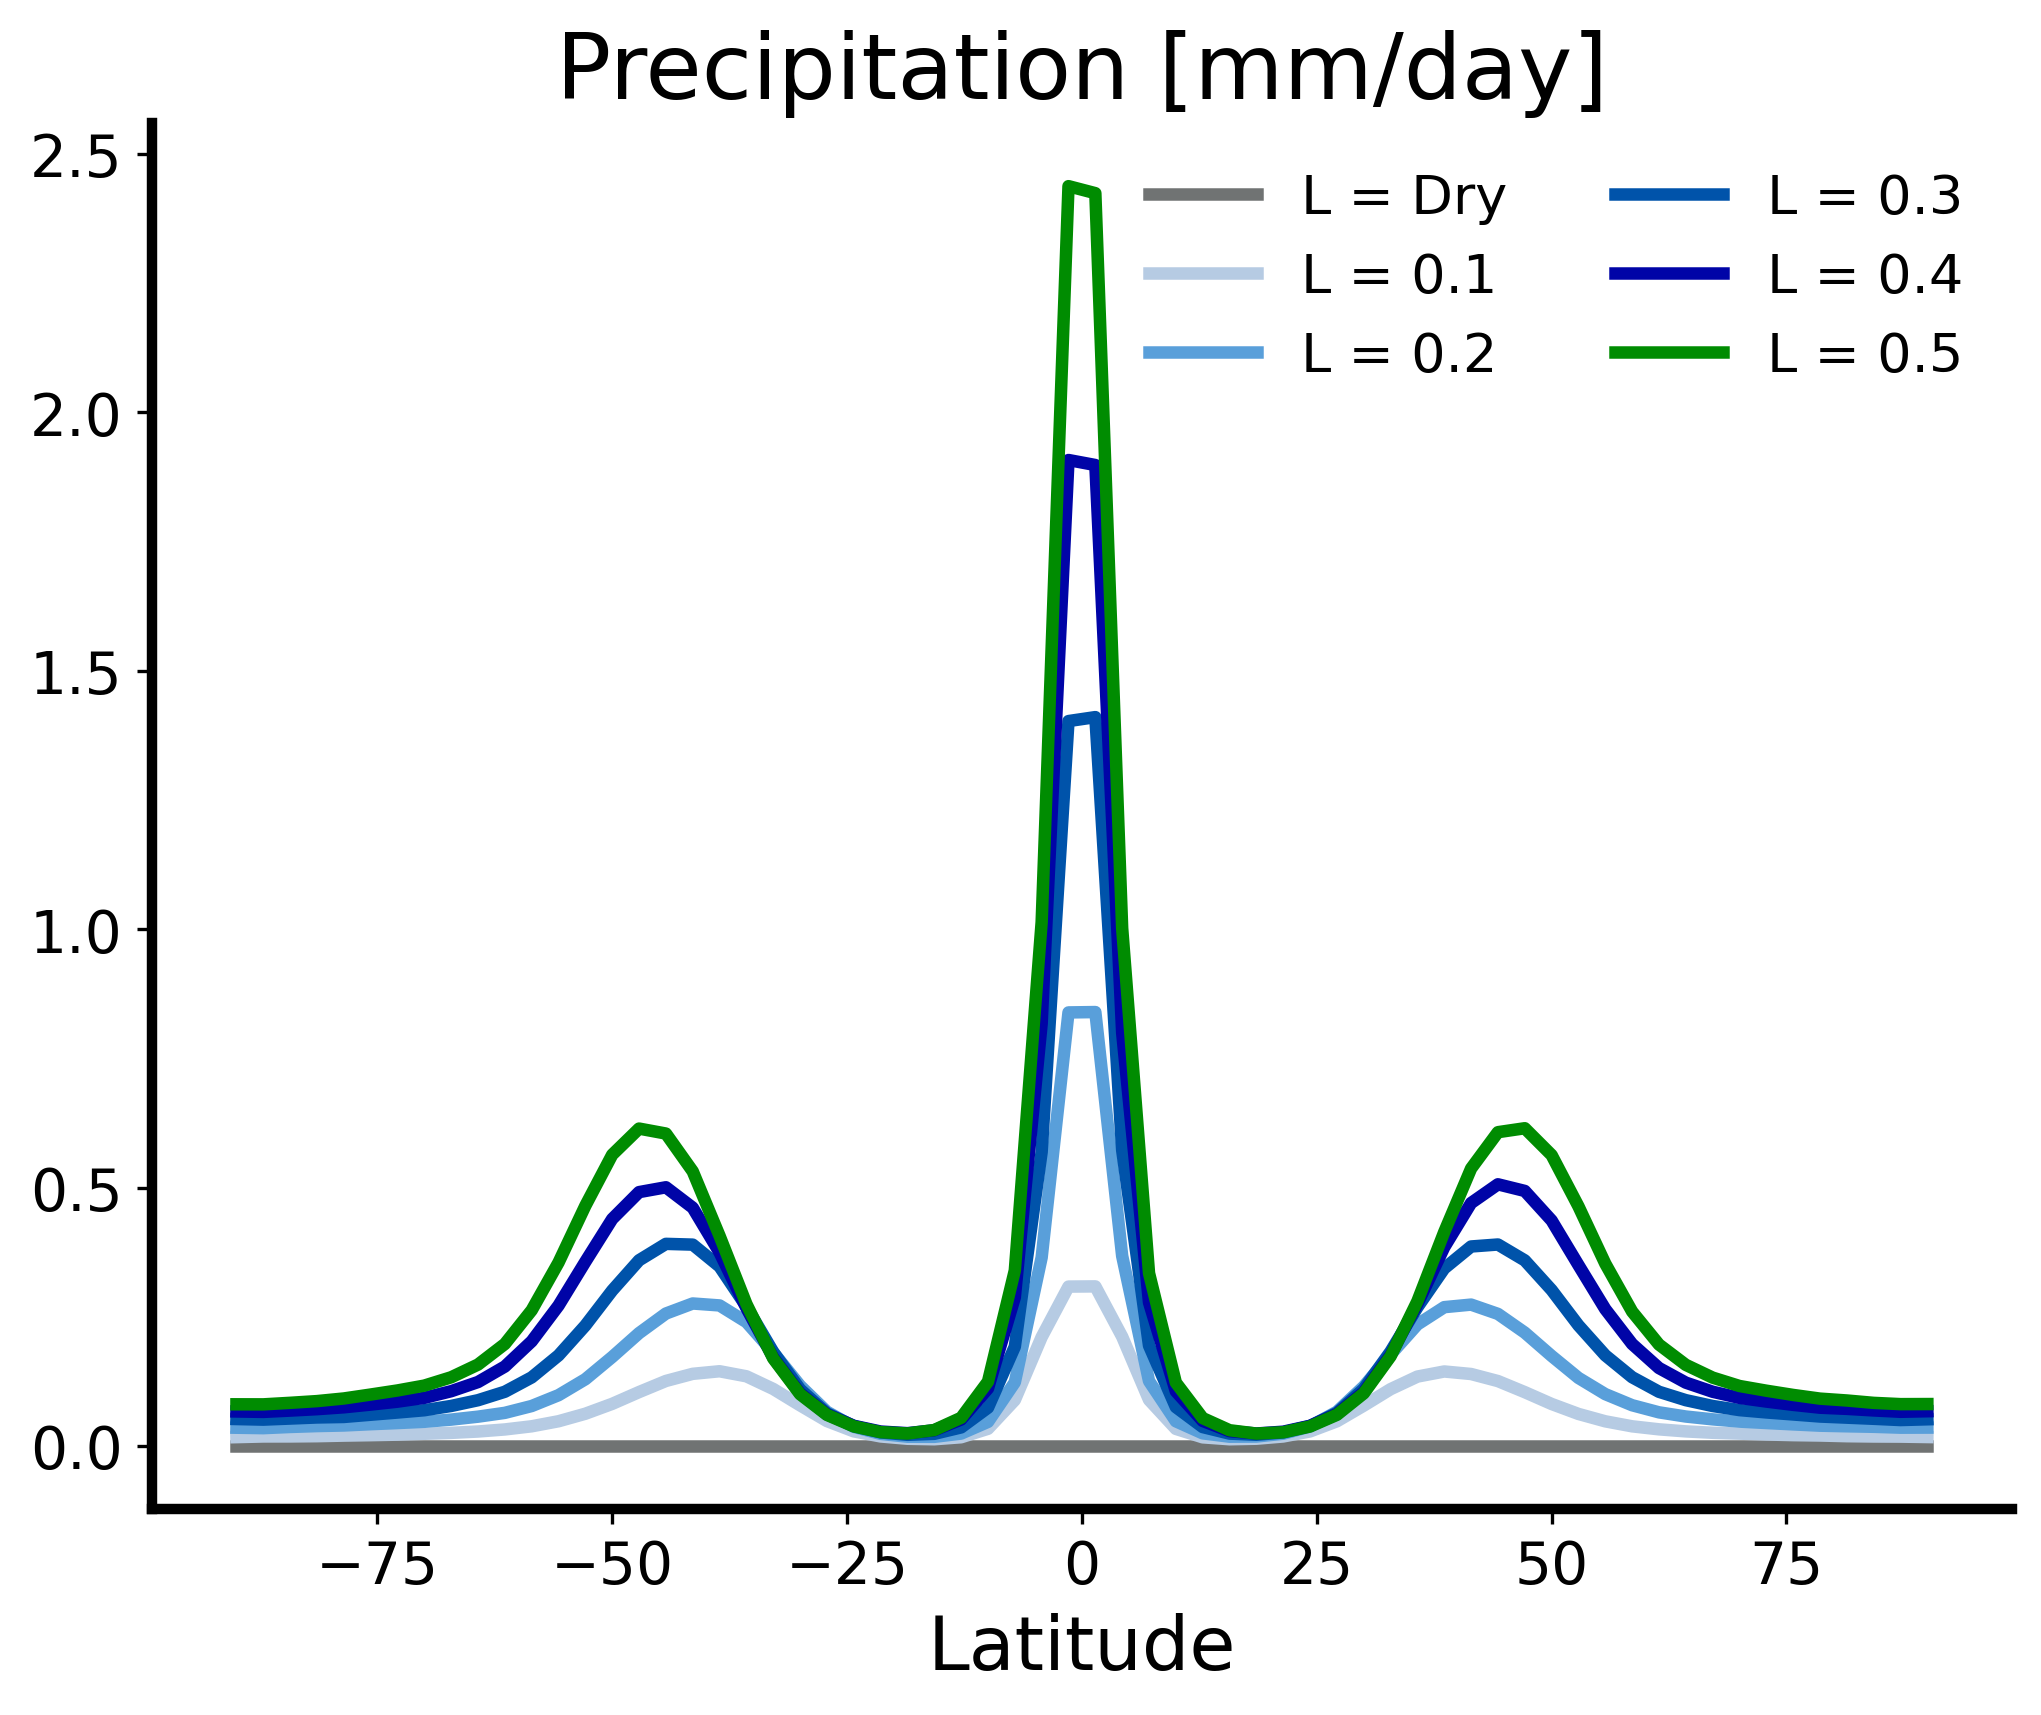

In [176]:
# prec_mean_array = np.zeros((6, 64))
# Read p variable
y = np.linspace(-90,90,64)
aa = 0
fig, ax = plt.subplots(1, figsize=(8,6), dpi=300.)
for PR in [0, 10, 20, 30, 40, 50]:
    # prec_file_path = "/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF" + f"/PR{PR}/prec/PR{PR}_500_20000day_6hourly_prec.dat"

    # with h5py.File(prec_file_path, 'r') as file:
    #         prec = np.asarray(file['prec'][:, :, :])
        
    # prec_mean = np.mean(prec, axis=(0,2)) 
    # prec_mean_array[aa] = prec_mean
    if PR ==0:
        ax.plot(y, prec_mean_array[aa] * 86400 * PR * 0.01 , label=f"L = Dry", color=colors[int(PR*0.1)], lw=3)
    else:
        ax.plot(y, prec_mean_array[aa] * 86400 * PR * 0.01 , label=f"L = {0.01*PR}", color=colors[int(PR*0.1)], lw=3)
    aa += 1


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="best", prop={'size': 13},frameon=False, ncols=2)
ax.set_title("Precipitation [mm/day]", fontsize=22)
ax.set_xlabel("Latitude", fontsize=18)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
mpl.rcParams['axes.linewidth'] = 3

plt.savefig(f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/113-1Seminar_fig/prec_all/PR{PR}.png", bbox_inches='tight', dpi=300)
plt.show()

# Visualize AM

In [1]:
def Cal_EOF_PC_for_barotropic(input_data):
    from EOF import EOF
    # input : (time, y)
    
    # Perform latitude weighting
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[1]))))

    # Initialize an EOF instance with weighted input data
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    print("n_component:", n_component)
    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="1D")
    
    # Compute EOFs and PCs
    eof_instance.get()
    
    # Retrieve EOFs and PCs and Extract EOF1, PC1, EOF2, and PC2
    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    # Normalize PCs and EOFs
    PC1_norm, PC2_norm = PC1 / PC1.std(), PC2 / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm, PC1_norm, EOF2_norm, PC2_norm, eof_instance.explained[:10]

In [3]:
Uzm_file1  = h5py.File("/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/daily_output_20000day/PR10_50_0_20000day_u.h5", "r")
u_50  = np.asarray(Uzm_file1["u"][-1,500:,:,:,:])

Uzm_file2  = h5py.File("/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/daily_output_20000day/PR0_0_20000day_u.h5", "r")
u_0  = np.asarray(Uzm_file2["u"][0,500:,:,:,:])
print(u_0.shape)

(19500, 20, 64, 128)


In [4]:
EOF1, PC1, EOF2, PC2, hi = Cal_EOF_PC_for_barotropic(u_0[:,:,:].mean(axis=(1,3)))
EOF1, PC1_50, EOF2, PC2, hi = Cal_EOF_PC_for_barotropic(u_50[:,:,:].mean(axis=(1,3)))



n_component: 64
n_component: 64


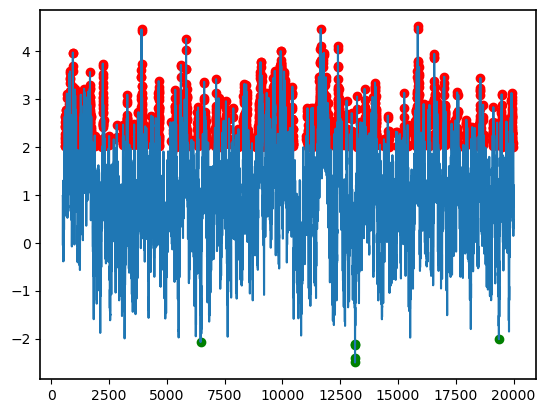

In [245]:
PC1_big_indices = np.where(PC1_50 >  PC1_50.std() * 2)
PC1_sml_indices = np.where(PC1 <  -PC1.std() * 2)

# Select the values from PC1[0] that satisfy the condition
PC1_big = PC1_50[PC1_big_indices]
PC1_sml = PC1[PC1_sml_indices]


x = np.linspace(0,360,128)
y = np.linspace(-90,90,64)
xx,yy = np.meshgrid(x,y)
days = np.linspace(500,20000,19500)

# Plot the data
plt.figure()
plt.plot(days, PC1)
plt.scatter(days[PC1_big_indices], PC1_big, color="red")
plt.scatter(days[PC1_sml_indices], PC1_sml, color="green")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

PC1_big_indices_right_index = (PC1_big_indices[0])
PC1_sml_indices_right_index = (PC1_sml_indices[0])

# Latitude range
y = np.linspace(-90, 90, 64)

# Calculate the latitude of maximum u wind for PC1_big_indices_right_index in the Northern Hemisphere
northern_hemisphere_indices = np.where(y > 0)  # Select indices for latitudes > 0 (Northern Hemisphere)
southern_hemisphere_indices = np.where(y < 0)  # Select indices for latitudes < 0 (Southern Hemisphere)

max_lat_big_nh = y[northern_hemisphere_indices][np.argmax(u_50[PC1_big_indices_right_index].mean(axis=(0,1,3))[northern_hemisphere_indices])]
max_lat_big_sh = y[southern_hemisphere_indices][np.argmax(u_50[PC1_big_indices_right_index].mean(axis=(0,1,3))[southern_hemisphere_indices])]

# Calculate the latitude of maximum u wind for PC1_sml_indices_right_index in the Northern Hemisphere
max_lat_sml_nh = y[northern_hemisphere_indices][np.argmax(u_0[PC1_sml_indices_right_index].mean(axis=(0,1,3))[northern_hemisphere_indices])]
max_lat_sml_sh = y[southern_hemisphere_indices][np.argmax(u_0[PC1_sml_indices_right_index].mean(axis=(0,1,3))[southern_hemisphere_indices])]


# Plot for PC1_big_indices_right_index (poleward shift)
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1.8, 1]}, dpi=300.)
CS1 = ax[0,0].contourf(xx, yy, u_50[PC1_big_indices_right_index].mean(axis=(0, 1)), 
                     levels=np.linspace(-0, 25, 11), extend="both")
ax[0,0].set_title("Poleward shift")

plt.colorbar(CS1, orientation="vertical", ax=ax[0,1])

# Plot the u wind mean profile and add a horizontal line for max wind latitude in NH and SH
ax[0,1].plot(u_50[PC1_big_indices_right_index].mean(axis=(0, 1, 3)), y)
ax[0,1].hlines(y=max_lat_big_nh, xmin=-5, xmax=25, colors='r', linestyles='dashed')
ax[0,1].hlines(y=max_lat_big_sh, xmin=-5, xmax=25, colors='r', linestyles='dashed')
ax[0,1].set_xlabel("u wind [m/s]")

# Plot for PC1_sml_indices_right_index (equatorward shift)
CS2 = ax[1,0].contourf(xx, yy, u_0[PC1_sml_indices_right_index].mean(axis=(0, 1)), 
                     levels=np.linspace(-0, 25, 11), extend="both")
ax[1,0].set_title("Equatorward shift")

plt.colorbar(CS2, orientation="vertical", ax=ax[1,1])

# Plot the u wind mean profile and add a horizontal line for max wind latitude in NH and SH
ax[1,1].plot(u_0[PC1_sml_indices_right_index].mean(axis=(0, 1, 3)), y, color="darkorange")
ax[1,1].hlines(y=max_lat_sml_nh, xmin=-5, xmax=25, colors='green', linestyles='dashed')
ax[1,1].hlines(y=max_lat_sml_sh, xmin=-5, xmax=25, colors='green', linestyles='dashed')
ax[1,1].set_xlabel("u wind [m/s]")

# Hide y-axis tick labels for the right-hand plots
ax[0, 1].set_yticklabels([])
ax[1, 1].set_yticklabels([])

ax[0,0].set_xlabel("Latitude", fontsize=8)
ax[0,0].set_ylabel("Latitude", fontsize=8)

ax[1,0].set_xlabel("Latitude", fontsize=8)
ax[1,0].set_ylabel("Latitude", fontsize=8)



# ax[1, 1].set_yticklabels([])

plt.tight_layout()
plt.show()
###################################################################################
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.2

fig, ax = plt.subplots(1, figsize=(6,4), dpi=300.)
ax.plot(y, u_50[PC1_big_indices_right_index].mean(axis=(0, 1, 3)), lw=2, label="Poleward shift")
ax.plot(y, u_0[PC1_sml_indices_right_index].mean(axis=(0, 1, 3)), lw=2, label="Equatorward shift", color="darkorange")
# ax.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Latitude", fontsize=8)
ax.set_title("u wind [m/s]", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(direction='out', length=6)


## Animation

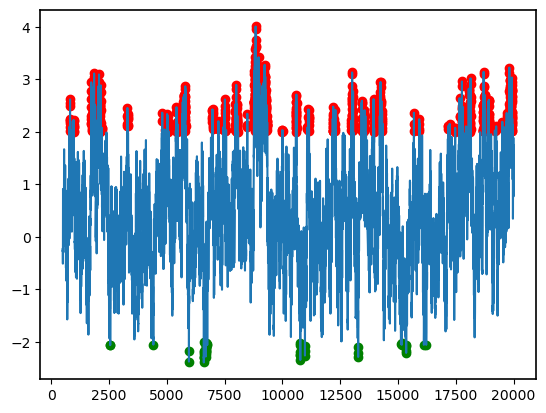

In [274]:
PC1_big_indices = np.where(PC1 >  PC1.std() * 2)
PC1_sml_indices = np.where(PC1 <  -PC1.std() * 2)

# Select the values from PC1[0] that satisfy the condition
PC1_big = PC1[PC1_big_indices]
PC1_sml = PC1[PC1_sml_indices]


x = np.linspace(0,360,128)
y = np.linspace(-90,90,64)
xx,yy = np.meshgrid(x,y)
days = np.linspace(500,20000,19500)

# Plot the data
plt.figure()
plt.plot(days, PC1)
plt.scatter(days[PC1_big_indices], PC1_big, color="red")
# plt.scatter(days[PC1_big_indices[0]-500], PC1_big, color="Orange")
# plt.scatter(days[PC1_big_indices[0]-50], PC1_50[PC1_big_indices[0]-50], color="Purple")
# plt.scatter(days[PC1_big_indices[0]+100], PC1_50[PC1_big_indices[0]+100], color="Orange")


plt.scatter(days[PC1_sml_indices], PC1_sml, color="green")
plt.show()


In [280]:
time_idx_start = PC1_big_indices[0][287] - 50
time_idx_end   = PC1_sml_indices[0][3]   + 50
print(time_idx_start)
print(PC1_big_indices[0][287])
print(PC1_sml_indices[0][3])

# print(PC1_big_indices[0][967])
# print(PC1_sml_indices[0][48])
import cartopy.feature as cfeature
print(u_0.shape)

5262
5312
5456
(19500, 20, 64, 128)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and longitude data
lon = np.linspace(0, 360, u_0.shape[3])
lat = np.linspace(-90, 90, u_0.shape[2])

aa = 0
for i in range(time_idx_start, time_idx_end, 1):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300.,
                           subplot_kw={'projection': ccrs.Robinson()})  # Use Robinson projection
    
    # Create meshgrid for lat/lon
    lon2d, lat2d = np.meshgrid(lon, lat)
    
    # Plot the u-wind data on the Earth sphere using Cartopy
    cs = ax.contourf(lon2d, lat2d, u_0[i].mean(axis=(0)), 
                     levels=np.linspace(-5, 30, 11), cmap="coolwarm", transform=ccrs.PlateCarree(), extend="both")
    
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Add colorbar
    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes("bottom", size="5%", pad=0.25)
    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x0,
                    ax.get_position().y0-0.08,
                    ax.get_position().width,
                    0.02])
    cbar = plt.colorbar(cs, orientation="horizontal", pad=0.05, cax=cax)
    cbar.set_label('U wind [m/s]')
    
    # Add title
    ax.set_title(f"Day {aa} [u] wind on Earth", fontsize=12)
    
    # Save the figure
    plt.savefig(f"113-1Seminar_fig/visualize/cross_profile/{aa}.png", bbox_inches='tight', dpi=300.)
    plt.close()
    aa += 1


In [ ]:
savepath = "113-1Seminar_fig/visualize/cross_profile/"
# !cd $savepath && ffmpeg -r 5 -i %d.png -pix_fmt yuv420p result.mp4 -y
!cd $savepath && ffmpeg -r 5 -i %d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -pix_fmt yuv420p result.mp4 -y


(20, 128)


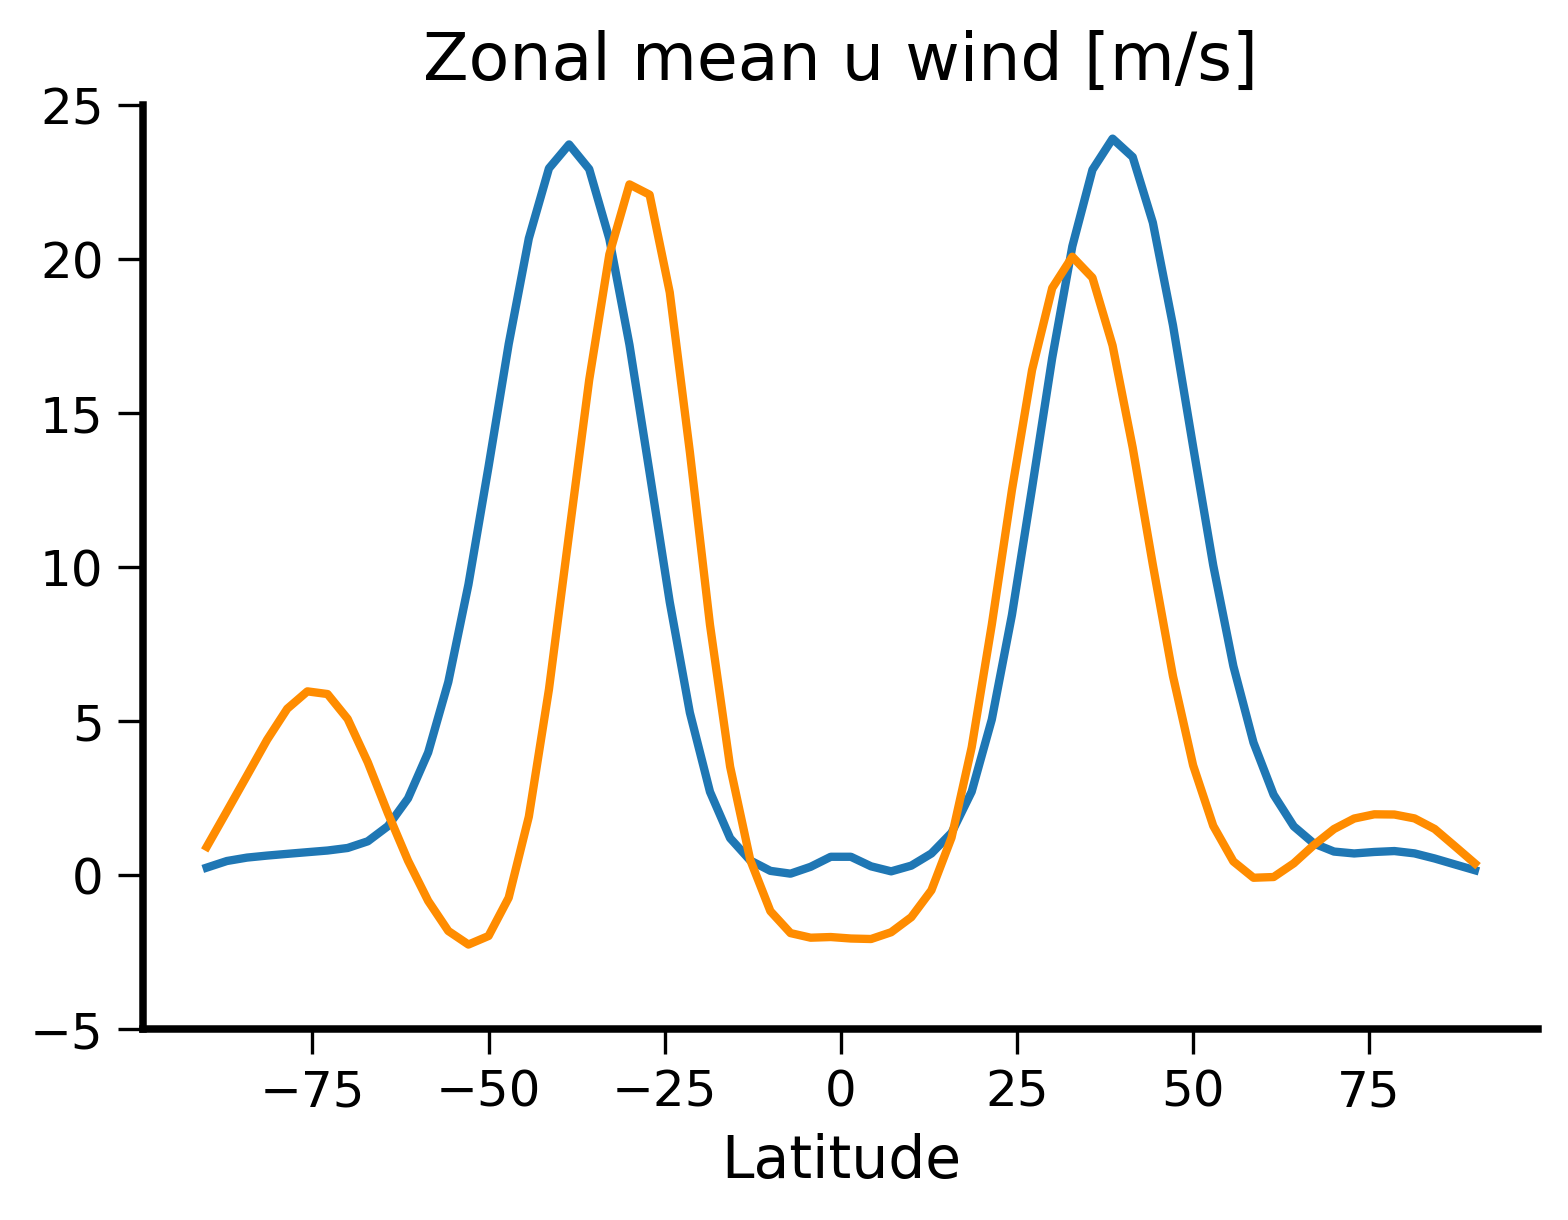

In [425]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.8
print(u_0[PC1_big_indices[0]].mean(axis=(0, 2)).shape)
fig, ax = plt.subplots(1, figsize=(6,4), dpi=300.)
ax.plot(y[:], u_50[PC1_big_indices[0],:,:].mean(axis=(0, 1, 3)), lw=2, label="Poleward shift")
ax.plot(y[:], u_0[PC1_sml_indices[0],:,:].mean(axis=(0, 1, 3)), lw=2, label="Equatorward shift", color="darkorange")
# ax.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Latitude", fontsize=14)
ax.set_title("Zonal mean u wind [m/s]", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(direction='out', length=6)
ax.set_ylim([-5,25])
plt.savefig(f"113-1Seminar_fig/visualize/only_y_dim/{aa}.png", bbox_inches='tight', dpi=300.)
# plt.close()

In [419]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and longitude data
lon = np.linspace(0, 360, u_0.shape[3])
lat = np.linspace(-90, 90, u_0.shape[2])

aa = 0
for i in range(time_idx_start, time_idx_end, 1):
    # Use North Polar Stereographic projection
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300.,
                           subplot_kw={'projection': ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None)})
    
    # Create meshgrid for lat/lon
    lon2d, lat2d = np.meshgrid(lon, lat)
    
    # Plot the u-wind data on the Earth sphere using Cartopy
    cs = ax.contourf(lon2d, lat2d, u_0[i].mean(axis=(0)), 
                     levels=np.linspace(-5, 30, 11), cmap="coolwarm", transform=ccrs.PlateCarree(), extend="both")
    
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Add colorbar
    # cax = fig.add_axes([ax.get_position().x0,
    #                     ax.get_position().y0 - 0.08,
    #                     ax.get_position().width,
    #                     0.02])
    cbar = plt.colorbar(cs, orientation="vertical", pad=0.05)
    cbar.set_label('U wind [m/s]', labelpad=-40, y=1.1, rotation=0)
    
    # Add title
    ax.set_title(f"Day {aa} [u] wind - North Pole Centered", fontsize=16)
    
    # Set map limits to focus on the Northern Hemisphere
    # ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    
    # Save the figure
    plt.savefig(f"113-1Seminar_fig/visualize/NorthPole/{aa}.png", bbox_inches='tight', dpi=300.)
    plt.close()
    aa += 1


In [420]:
savepath = "113-1Seminar_fig/visualize/NorthPole/"
!cd $savepath && ffmpeg -r 5 -i %d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -pix_fmt yuv420p result.mp4 -y

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 12.4.0 (conda-forge gcc 12.4.0-0)
  configuration: --prefix=/home/PeterChang/miniconda3/envs/ML22 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enabl

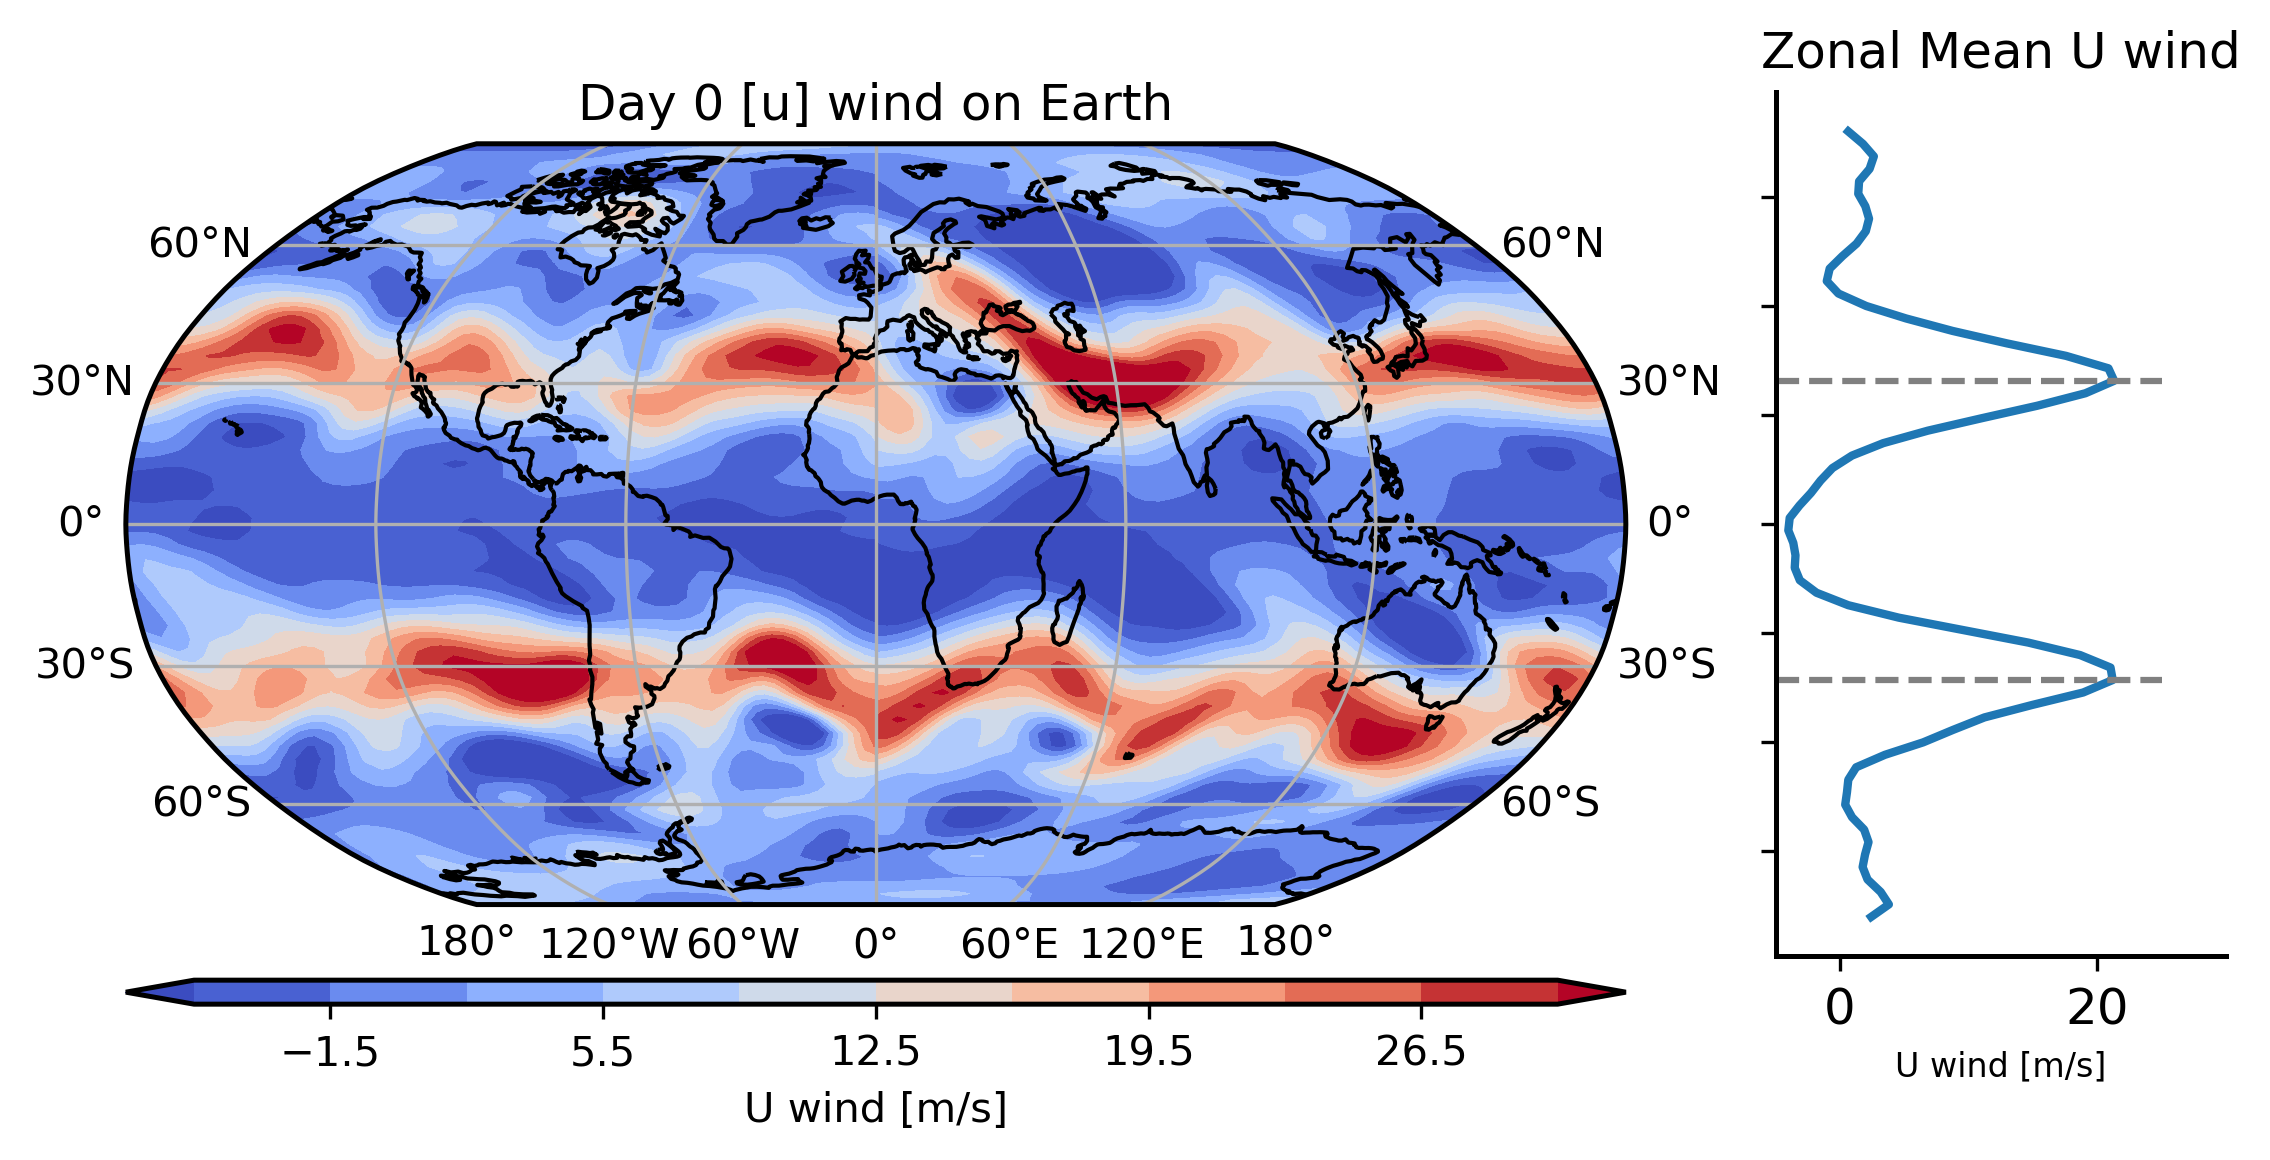

In [403]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and longitude data
lon = np.linspace(0, 360, u_0.shape[3])
lat = np.linspace(-90, 90, u_0.shape[2])

aa = 0
for i in range(time_idx_start, time_idx_end, 1):
    fig = plt.figure(figsize=(10, 8), dpi=300)

    # Create first axis for contour plot with Robinson projection
    ax1 = fig.add_axes([0.05, 0.1, 0.5, 0.8], projection=ccrs.Robinson())  # Adjust the size/position as needed

    # Create meshgrid for lat/lon
    lon2d, lat2d = np.meshgrid(lon, lat)

    # Plot the u-wind data on the Earth sphere using Cartopy
    cs = ax1.contourf(lon2d, lat2d, u_0[i].mean(axis=(0)),
                      levels=np.linspace(-5, 30, 11), cmap="coolwarm", 
                      transform=ccrs.PlateCarree(), extend="both")
    
    # Add coastlines and gridlines
    ax1.coastlines()
    
    # Adjust gridlines to only show labels on the left and bottom
    gl = ax1.gridlines(draw_labels=True)
    gl.top_labels = False  # Hide top labels
    # # gl.right_labels = False  # Hide right labels
    # gl.left_labels = True   # Show left labels
    # gl.bottom_labels = True  # Show bottom labels
    
    # Add title to the contour plot
    ax1.set_title(f"Day {aa} [u] wind globally", fontsize=12)

    # Add colorbar for contour plot
    cax1 = fig.add_axes([0.05, 0.3, 0.5, 0.01])  # Custom position for colorbar
    cbar1 = plt.colorbar(cs, orientation="horizontal", pad=0.05, cax=cax1)
    cbar1.set_label('U wind [m/s]')

    # Now, create a second axis for the line plot
    max_lat_big_nh = y[northern_hemisphere_indices][np.argmax(u_0[i].mean(axis=(0,2))[northern_hemisphere_indices])]
    max_lat_big_sh = y[southern_hemisphere_indices][np.argmax(u_0[i].mean(axis=(0,2))[southern_hemisphere_indices])]
    
    # Create second axis for zonal wind plot
    ax2 = fig.add_axes([0.6, 0.32, 0.15, 0.36])  # Adjust the position and size of the line plot

    # Plot the zonal mean u wind
    ax2.plot(u_0[i].mean(axis=(0, 2)), y, lw=2, label="Poleward shift")
    
    # Customize the line plot
    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    ax2.set_xlabel("u wind [m/s]", fontsize=8)
    ax2.set_title("Zonal Mean [u] wind", fontsize=12)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax2.set_xlim([-5, 30])
    ax2.set_yticklabels([])  # Remove y-axis tick labels
    ax2.hlines(y=max_lat_big_nh, xmin=-5, xmax=25, colors='gray', linestyles='dashed')
    ax2.hlines(y=max_lat_big_sh, xmin=-5, xmax=25, colors='gray', linestyles='dashed')

    # Save the figure
    # plt.tight_layout()
    plt.savefig(f"113-1Seminar_fig/visualize/cross_profile/{aa}.png", bbox_inches='tight', dpi=300)
    plt.close()
    aa += 1


In [402]:
savepath = "113-1Seminar_fig/visualize/cross_profile/"
!cd $savepath && ffmpeg -r 5 -i %d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -pix_fmt yuv420p result.mp4 -y

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 12.4.0 (conda-forge gcc 12.4.0-0)
  configuration: --prefix=/home/PeterChang/miniconda3/envs/ML22 --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1722545971544/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-vaapi --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enabl

# m and z autocorrelation

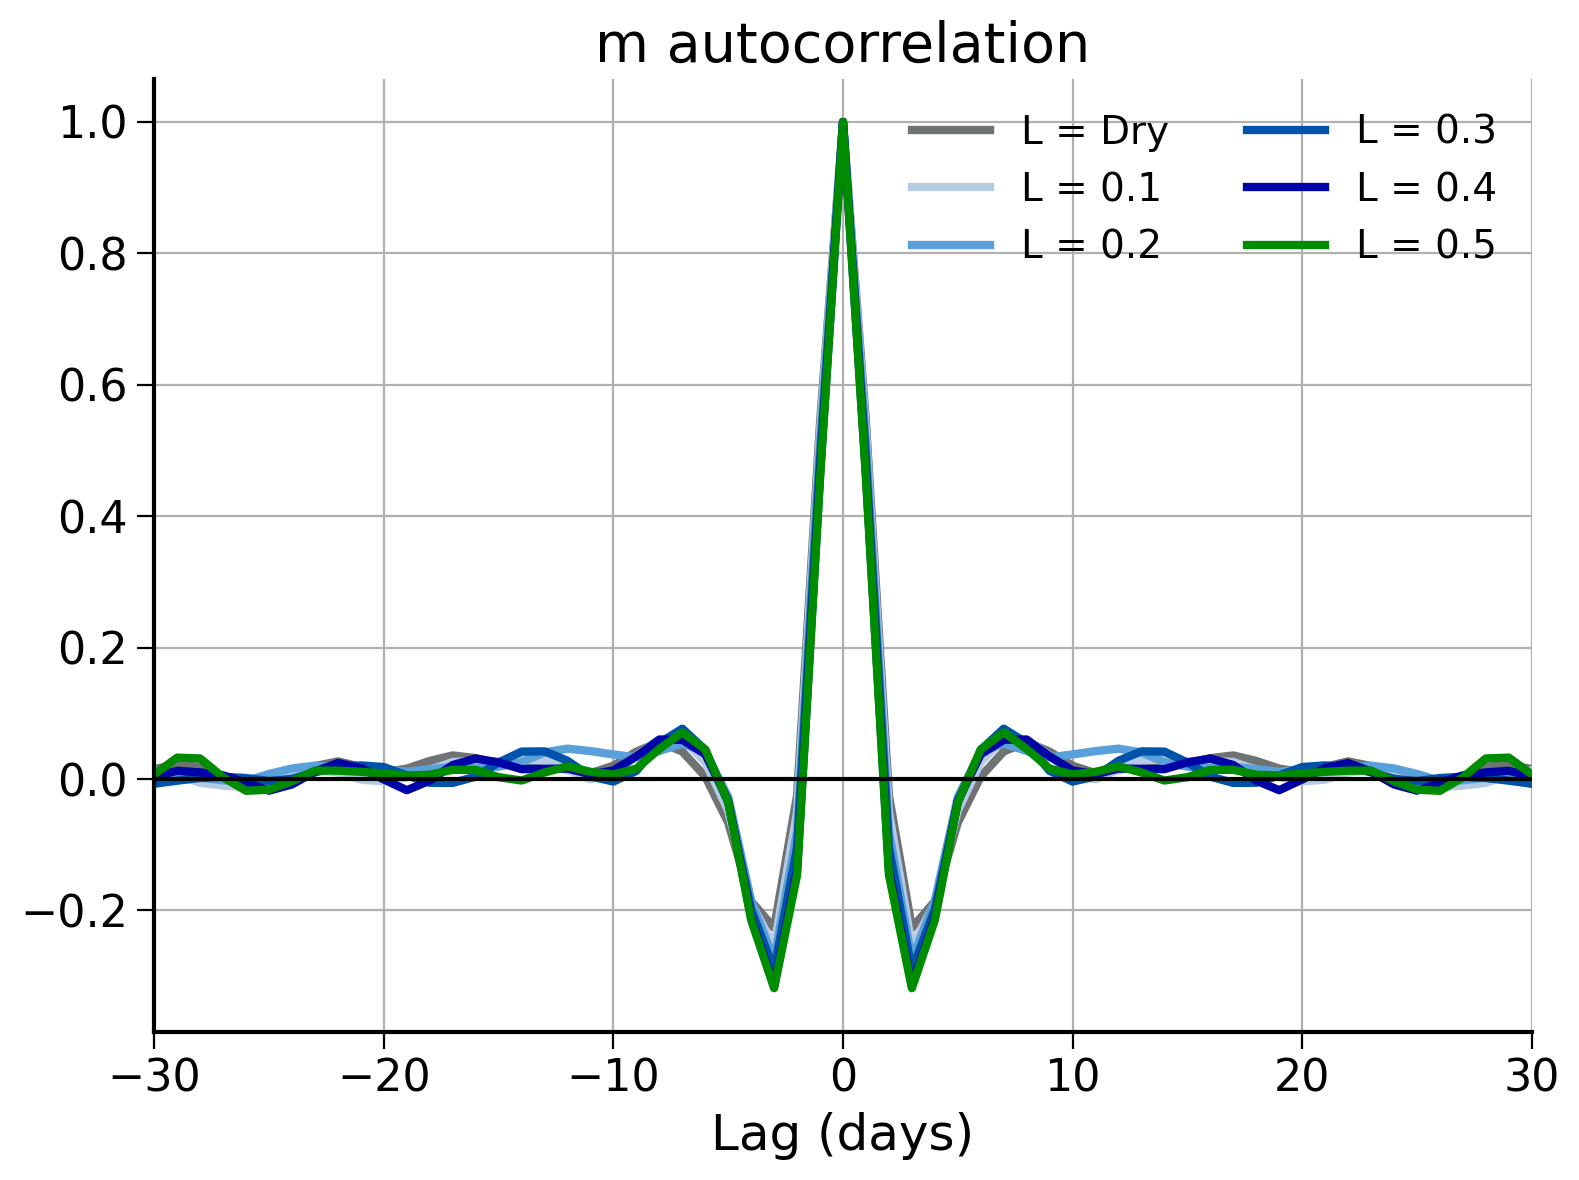

In [486]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

# Constants
radius = 6.37122e6
y = np.linspace(-90, 90, 64)
yd = np.deg2rad(y)
cy = np.cos(yd)
PR_values = range(0, 60, 10)  # PR values from 0 to 50

# Colors for different PR values
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]]) / 255

# Function to calculate EOF and PC
def Cal_EOF_PC(input_data):
    from EOF import EOF
    
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    eof_instance.get()

    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    PC1_norm, PC2_norm = (PC1 - PC1.mean()) / PC1.std(), (PC2 - PC2.mean()) / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm.reshape(20,32), PC1_norm, EOF2_norm.reshape(20,32), PC2_norm, eof_instance.explained[:10]

# Function to calculate autocorrelation with chunking and overlap
def autocorr_chunked_overlap(x, lags, chunk_size, overlap_size):
    step_size = chunk_size - overlap_size
    num_chunks = (len(x) - overlap_size) // step_size
    corr = np.zeros(int(lags))

    for i in range(num_chunks):
        start = i * step_size
        end = start + chunk_size
        x_chunk = x[start:end]
        chunk_corr = np.zeros(int(lags))
        for l in range(lags):
            if l == 0:
                chunk_corr[l] = 1.
            else:
                chunk_corr[l] = np.corrcoef(x_chunk[l:], x_chunk[:-l])[0][1]
        corr += chunk_corr

    corr /= num_chunks
    return np.array(corr)

# Initialize the plot
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=200)
mpl.rcParams['axes.linewidth'] = 1.5
# Loop over PR values
for idx, PR in enumerate(PR_values):
    # Load EMF and u data
    emf_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EMF/PR{PR}_500_20000day_EMF_zonal_mean_daily.dat"
    with h5py.File(emf_file, "r") as u_file0:
        EMF = np.asarray(u_file0["EMF"][:,:,:])

    u_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
    with h5py.File(u_file, "r") as u_file0:
        u = np.asarray(u_file0["u"][:,:,:])

    # Calculate EOF and PC
    EOF1, PC1, EOF2, PC2, explained_variance = Cal_EOF_PC(u[:,:,32:])

    # Prepare data for autocorrelation
    dmdy = np.zeros((6, 19500, 20, 64))
    for a in range(1):
        Mzm = EMF
        for i in range(1, 64-1):
            Mzm[:,:,i] = cy[i]**0.5 * Mzm[:,:,i]
        
        for i in range(1, 64-1):
            dmdy[a,:,:,i] = -(Mzm[:,:,i+1] * (cy[i]**2) - Mzm[:,:,i-1]* (cy[i]**2)) / (radius * (cy[i]**2) * (yd[i+1] - yd[i-1]))
        dmdy[a,:,:,0] = -(Mzm[:,:,1]* (cy[i]**2) - Mzm[:,:,0]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[1] - yd[0]))
        dmdy[a,:,:,-1] = -(Mzm[:,:,-1]* (cy[i]**2) - Mzm[:,:,-2]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[-1] - yd[-2]))

    m = EOF1.reshape(20*32).dot(dmdy[0,:,:,32:].reshape(19500, 32*20).T)
    m_final = (m - m.mean()) / m.std()

    auto_length = 100
    chunk_size = 128  # Set your chunk size here
    overlap_size = 64  # Set your overlap size here
    yyy_thin  = autocorr_chunked_overlap(m[:], auto_length, chunk_size, overlap_size) 

    tau_full = np.arange(-auto_length+1,auto_length,1)
    yyy_thin_full = np.zeros(int(auto_length-1)*2+1) # 41
    yyy_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy_thin[1:]
    yyy_thin_full[:int((len(yyy_thin_full)+1)/2)]  = yyy_thin[::-1]

    # Plot the result for the current PR value
    if PR == 0:
        ax.plot(tau_full, yyy_thin_full, label=f"L = Dry", color=colors[idx], lw=3)
    else:
        ax.plot(tau_full, yyy_thin_full, label=f"L = {PR*0.01}", color=colors[idx], lw=3)
        

# Finalize and show the plot
# ax.set_ylabel("Autocorrelation", fontsize=14)
# ax.legend(loc="best", prop={'size': 13},frameon=False, ncols=2)
# ax.set_title(f"Daily mean data: m autocorrelation with chunk:{chunk_size} and overlap:{overlap_size}")
ax.set_title("m autocorrelation", fontsize=20)


plt.grid()
plt.hlines(y=0, xmin=-100,xmax=100, lw=1.5, color="Black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Lag (days)", fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(direction='out', length=6)
ax.legend(loc="best", prop={'size': 14},frameon=False, ncols=2)

plt.xlim([-30,30])

plt.tight_layout()
plt.savefig(f"113-1Seminar_fig/visualize/autocorrelation/m.png", bbox_inches='tight', dpi=300)
plt.show()


In [451]:
# Function to calculate EOF and PC
def Cal_EOF_PC2(input_data):
    from EOF import EOF
    
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    eof_instance.get()

    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    PC1_norm, PC2_norm = (PC1 - PC1.mean()) / PC1.std(), (PC2 - PC2.mean()) / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1.reshape(20,32) *  PC1.std(), PC1 / PC1.std()

import numpy as np

def cross_corr_chunked(x, y, lag_max, chunk_size, overlap_size):
    """
    Calculate the cross-correlation between two signals x and y, using overlapping chunks.

    Parameters:
    x, y: Input signals to calculate cross-correlation.
    lag_max: Maximum number of lags to compute.
    chunk_size: Size of each chunk (default is 128).
    overlap_size: Number of points to overlap between chunks (default is 64).

    Returns:
    lags: Array of lag values.
    mean_corr: Averaged cross-correlation across all chunks.
    """
    step_size = chunk_size - overlap_size
    num_chunks = (len(x) - overlap_size) // step_size  # Number of chunks with overlap
    print(num_chunks)
    corr_matrix = np.zeros((num_chunks, 2 * lag_max + 1))  # Store cross-correlation for each chunk

    for i in range(num_chunks):
        start = i * step_size
        end = start + chunk_size

        if end > len(x) or end > len(y):  # Avoid going beyond the signal length
            break

        # Extract the chunk from x and y
        x_chunk = x[start:end]
        y_chunk = y[start:end]

        # Compute the cross-correlation for the current chunk        
        corr = np.correlate(x_chunk-np.mean(x_chunk), y_chunk-np.mean(y_chunk), mode='full')
        mid  = len(corr) // 2
        chunk_corr = corr[mid-lag_max:mid+lag_max+1] / (len(x_chunk) * np.std(x_chunk) * np.std(y_chunk))

        # Store the chunk correlation
        corr_matrix[i, :] = chunk_corr

    # Average the cross-correlation across all chunks
    mean_corr = np.mean(corr_matrix, axis=0)
    lags = np.arange(-lag_max, lag_max + 1)

    return lags, mean_corr



303
303
303
303
303
303


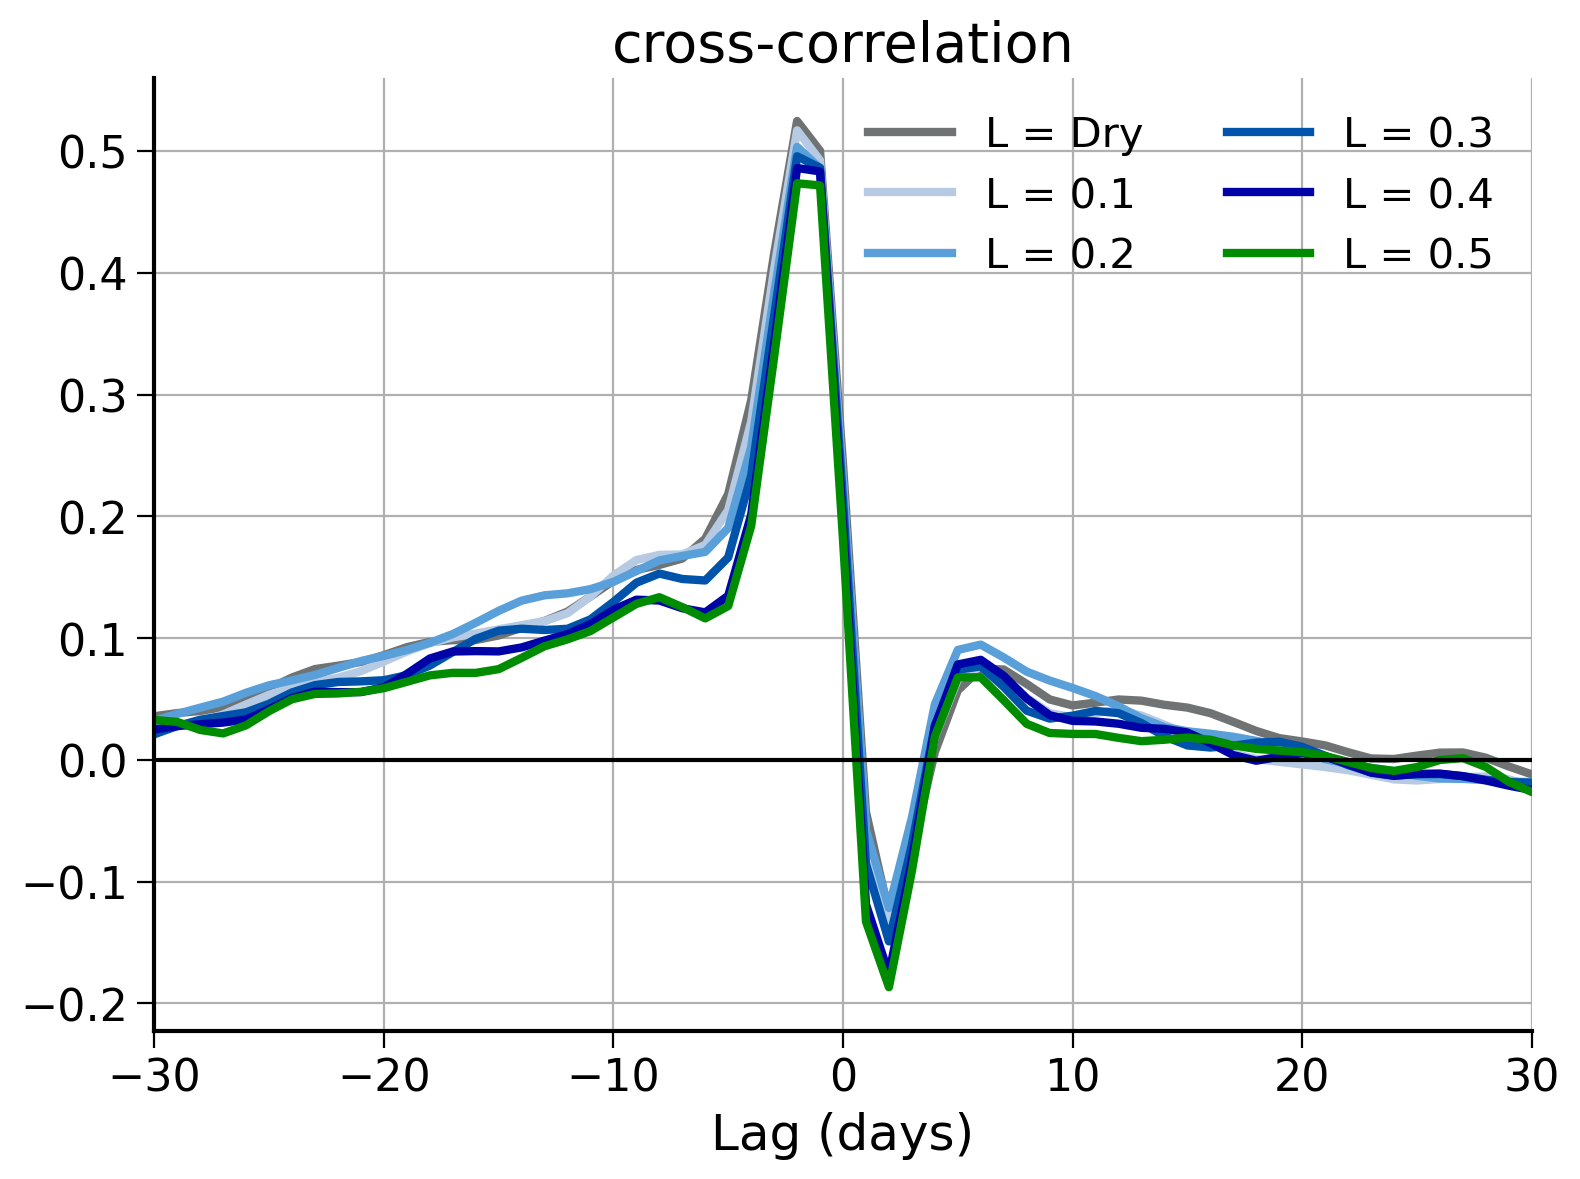

In [453]:
 # Main loop to compute cross-correlation of m and PC1 with chunking and overlap
fig, ax = plt.subplots(1, figsize=(8, 6), dpi=200)
# Constants
radius = 6.37122e6
y = np.linspace(-90, 90, 64)
yd = np.deg2rad(y)
cy = np.cos(yd)
PR_values = range(0, 60, 10)  # PR values from 0 to 50
mpl.rcParams['axes.linewidth'] = 1.5

for idx, PR in enumerate(PR_values):
    # Load EMF and u data
    emf_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/EMF/PR{PR}_500_20000day_EMF_zonal_mean_daily.dat"
    with h5py.File(emf_file, "r") as u_file0:
        EMF = np.asarray(u_file0["EMF"][:,:,:])

    u_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
    with h5py.File(u_file, "r") as u_file0:
        u = np.asarray(u_file0["u"][:,:,:])

    # Calculate EOF and PC
    EOF1, PC1 = Cal_EOF_PC2(u[:,:,32:])
    # Prepare data for cross-correlation
    dmdy = np.zeros((19500, 20, 64))
    Mzm = EMF
    
    for i in range(1, 64-1):
        dmdy[:,:,i] = -(Mzm[:,:,i+1] * (cy[i]**2) - Mzm[:,:,i-1]* (cy[i]**2)) / (radius * (cy[i]**2) * (yd[i+1] - yd[i-1]))
    dmdy[:,:,0] = -(Mzm[:,:,1]* (cy[1]**2) - Mzm[:,:,0]* (cy[1]**2)) / (radius * cy[1]**2 *(yd[1] - yd[0]))
    dmdy[:,:,-1] = -(Mzm[:,:,-1]* (cy[i]**2) - Mzm[:,:,-2]* (cy[i]**2)) / (radius * cy[i]**2 *(yd[-1] - yd[-2]))

    m = EOF1.reshape(20*32).dot(dmdy[:,:,32:].reshape(19500,20*32).T) / (EOF1.reshape(20*32).dot(EOF1.reshape(20*32).T))
    
    m_final = (m - m.mean()) / m.std()
    PC1_final = (PC1 - PC1.mean()) / PC1.std()

    # Set the parameters for chunking and overlap
    auto_length = 100
    chunk_size = 128  # Set your chunk size here
    overlap_size = 64  # Set your overlap size here
    
    # Calculate cross-correlation between PC1 and m with chunking and overlap
    lags, cross_corr_values = cross_corr_chunked(m_final, PC1_final, auto_length, chunk_size, overlap_size)

    # Plot the result for the current PR value
    if PR == 0:
        ax.plot(lags, cross_corr_values, label=f"L = Dry", color=colors[idx], lw=3)
    else:
        ax.plot(lags, cross_corr_values, label=f"L = {PR * 0.01}", color=colors[idx], lw=3)
        
    

# Finalize and show the plot
ax.set_xlabel("Lag (days)")
ax.legend(loc="best", prop={'size': 15},frameon=False, ncols=2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Lag (days)", fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(direction='out', length=6)
plt.xlim([-30,30])
plt.tight_layout()


# ax.set_title(f"Daily mean data: Cross-correlation of PC1 and m with chunk:{chunk_size} and overlap:{overlap_size}")
ax.set_title("cross-correlation", fontsize = 20)


plt.tight_layout()
plt.grid()
plt.hlines(y=0, xmin=-100,xmax=100, lw=1.5, color="Black")
plt.xlim([-30, 30])
plt.savefig(f"113-1Seminar_fig/visualize/correlation/cross.png", bbox_inches='tight', dpi=300)

plt.show()


## z autocorrelation

In [456]:
commom_path = "/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/"
Uzm_all = np.zeros((((6, 19500, 20, 64))))
a = 0
for PR in range(0,60,10):
    PR_file = f"PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
    with h5py.File(commom_path+PR_file, "r") as u_file0:
        Uzm_all[a] = np.asarray(u_file0["u"][:,:,:])
    a += 1

In [460]:
def Cal_EOF_PC(input_data):
    from EOF import EOF
    
    # Perform latitude weighting
    input_data_weighted = input_data * np.sqrt(np.cos(np.deg2rad(np.linspace(0, 90, input_data.shape[2]))))

    # Initialize an EOF instance with weighted input data
    n_component = min(input_data.shape[0], input_data.size // input_data.shape[0])

    print("n_component:", n_component)
    eof_instance = EOF((input_data_weighted,), n_components=n_component, field="2D")
    
    # Compute EOFs and PCs
    eof_instance.get()
    
    # Retrieve EOFs and PCs and Extract EOF1, PC1, EOF2, and PC2
    EOF1, EOF2 = eof_instance.EOF[:2]
    PC1, PC2 = eof_instance.PC[:2]

    # Normalize PCs and EOFs
    PC1_norm, PC2_norm = PC1 / PC1.std(), PC2 / PC2.std()
    EOF1_norm, EOF2_norm = EOF1 * PC1.std(), EOF2 * PC2.std()
    
    return EOF1_norm.reshape(20,32), PC1_norm, EOF2_norm.reshape(20,32), PC2_norm, eof_instance.explained[:10]

In [490]:
def autocorr1(x,lags, spilt_to_chunk, window_length):
    if spilt_to_chunk == False:
        print("hihi")
        corr = np.zeros(int(lags))
        for l in range(lags):
            if l == 0:
                corr[l] = 1.
            else:
                corr[l] = np.corrcoef(x[l:],x[:-l])[0][1]
        return np.array(corr)
    if spilt_to_chunk == True:
        window_number = int(np.shape(x)[0] / window_length)
        if window_number * window_length != np.shape(x)[0]:
            x_window = np.zeros((window_number, window_length))
            #x_window[-1,-(np.shape(x)[0]- window_number * window_length):] = x[int(window_number * window_length):]
        else:
            x_window = np.zeros((window_number, window_length))
        for i in range(window_number):
            print(i)
            x_window[i,:] = x[i*window_length:(i+1)*window_length]


        corr = np.zeros((window_number , int(lags)))

        for i in range(window_number):
            for l in range(lags):
                if l == 0:
                    corr[i,l] = 1.
                else:
                    corr[i,l] = np.corrcoef(x_window[i,l:],x_window[i,:-l])[0][1]
        return np.array(corr).mean(axis=0)
    

In [491]:
PC1_all = np.zeros((6, 19500))
PC2_all = np.zeros((6, 19500))
print(PC1_all.shape)

for a in range(0,6):
    EOF1, PC1_all[a], EOF2, PC2_all[a], _ = Cal_EOF_PC(Uzm_all[a,:,:,32:])


(6, 19500)


In [492]:
auto_length = 100
window_length = 1000
spilt_to_chunk = False
yyy_thin  = autocorr1(PC1_all[0,:], auto_length, spilt_to_chunk, window_length) 
yyy2_thin = autocorr1(PC1_all[1,:], auto_length, spilt_to_chunk, window_length) 
yyy3_thin = autocorr1(PC1_all[2,:], auto_length, spilt_to_chunk, window_length) 
yyy4_thin = autocorr1(PC1_all[3,:], auto_length, spilt_to_chunk, window_length) 
yyy5_thin = autocorr1(PC1_all[4,:], auto_length, spilt_to_chunk, window_length) 
yyy6_thin = autocorr1(PC1_all[5,:], auto_length, spilt_to_chunk, window_length) 

yyy_thin2  = autocorr1(PC2_all[0,:], auto_length, spilt_to_chunk, window_length) 
yyy2_thin2 = autocorr1(PC2_all[1,:], auto_length, spilt_to_chunk, window_length) 
yyy3_thin2 = autocorr1(PC2_all[2,:], auto_length, spilt_to_chunk, window_length) 
yyy4_thin2 = autocorr1(PC2_all[3,:], auto_length, spilt_to_chunk, window_length) 
yyy5_thin2 = autocorr1(PC2_all[4,:], auto_length, spilt_to_chunk, window_length) 
yyy6_thin2 = autocorr1(PC2_all[5,:], auto_length, spilt_to_chunk, window_length) 

hihi
hihi
hihi
hihi
hihi
hihi
hihi
hihi
hihi
hihi
hihi
hihi


In [493]:
tau_full = np.arange(-auto_length+1,auto_length,1)
yyy_thin_full = np.zeros(int(auto_length-1)*2+1) # 41
yyy2_thin_full = np.zeros(int(auto_length-1)*2+1)
yyy3_thin_full = np.zeros(int(auto_length-1)*2+1)
yyy4_thin_full = np.zeros(int(auto_length-1)*2+1)
yyy5_thin_full = np.zeros(int(auto_length-1)*2+1)
yyy6_thin_full = np.zeros(int(auto_length-1)*2+1)

# L = 0
# yyy_thin_full[int((len(yyy_thin_full)+1)/2)]   = 1
yyy_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy_thin[1:]
yyy_thin_full[:int((len(yyy_thin_full)+1)/2)]  = yyy_thin[::-1]
# L = 0.1
yyy2_thin_full[int((len(yyy_thin_full)+1)/2):]  = yyy2_thin[1:]
yyy2_thin_full[:int(len(yyy_thin_full)/2)+1] = yyy2_thin[::-1]
# L = 0.2
yyy3_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy3_thin[1:]
yyy3_thin_full[:int(len(yyy_thin_full)/2)+1] = yyy3_thin[::-1]
# L = 0.3
yyy4_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy4_thin[1:]
yyy4_thin_full[:int(len(yyy_thin_full)/2)+1] = yyy4_thin[::-1]
# L = 0.4
yyy5_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy5_thin[1:]
yyy5_thin_full[:int(len(yyy_thin_full)/2)+1] = yyy5_thin[::-1]
# L = 0.5
yyy6_thin_full[int((len(yyy_thin_full)+1)/2):]   = yyy6_thin[1:]
yyy6_thin_full[:int(len(yyy_thin_full)/2)+1] = yyy6_thin[::-1]

#################################################################
yyy_thin2_full = np.zeros(int(auto_length-1)*2+1)
yyy2_thin2_full = np.zeros(int(auto_length-1)*2+1)
yyy3_thin2_full = np.zeros(int(auto_length-1)*2+1)
yyy4_thin2_full = np.zeros(int(auto_length-1)*2+1)
yyy5_thin2_full = np.zeros(int(auto_length-1)*2+1)
yyy6_thin2_full = np.zeros(int(auto_length-1)*2+1)

# L = 0
yyy_thin2_full[int((len(yyy_thin_full)+1)/2):]   = yyy_thin2[1:]
yyy_thin2_full[:int(len(yyy_thin_full)/2)+1] = yyy_thin2[::-1]
# L = 0.1
yyy2_thin2_full[int((len(yyy_thin_full)+1)/2):]   = yyy2_thin2[1:]
yyy2_thin2_full[:int(len(yyy_thin_full)/2)+1] = yyy2_thin2[::-1]
# L = 0.2
yyy3_thin2_full[int((len(yyy_thin_full)+1)/2):]   = yyy3_thin2[1:]
yyy3_thin2_full[:int(len(yyy_thin_full)/2)+1] = yyy3_thin2[::-1]
# L = 0.3
yyy4_thin2_full[int((len(yyy_thin_full)+1)/2):]   = yyy4_thin2[1:]
yyy4_thin2_full[:int(len(yyy_thin_full)/2)+1] = yyy4_thin2[::-1]
# L = 0.4
yyy5_thin2_full[int((len(yyy_thin_full)+1)/2):]   = yyy5_thin2[1:]
yyy5_thin2_full[:int(len(yyy_thin_full)/2)+1] = yyy5_thin2[::-1]
# L = 0.5
yyy6_thin2_full[int((len(yyy_thin_full)+1)/2):]   = yyy6_thin2[1:]
yyy6_thin2_full[:int(len(yyy_thin_full)/2)+1] = yyy6_thin2[::-1]


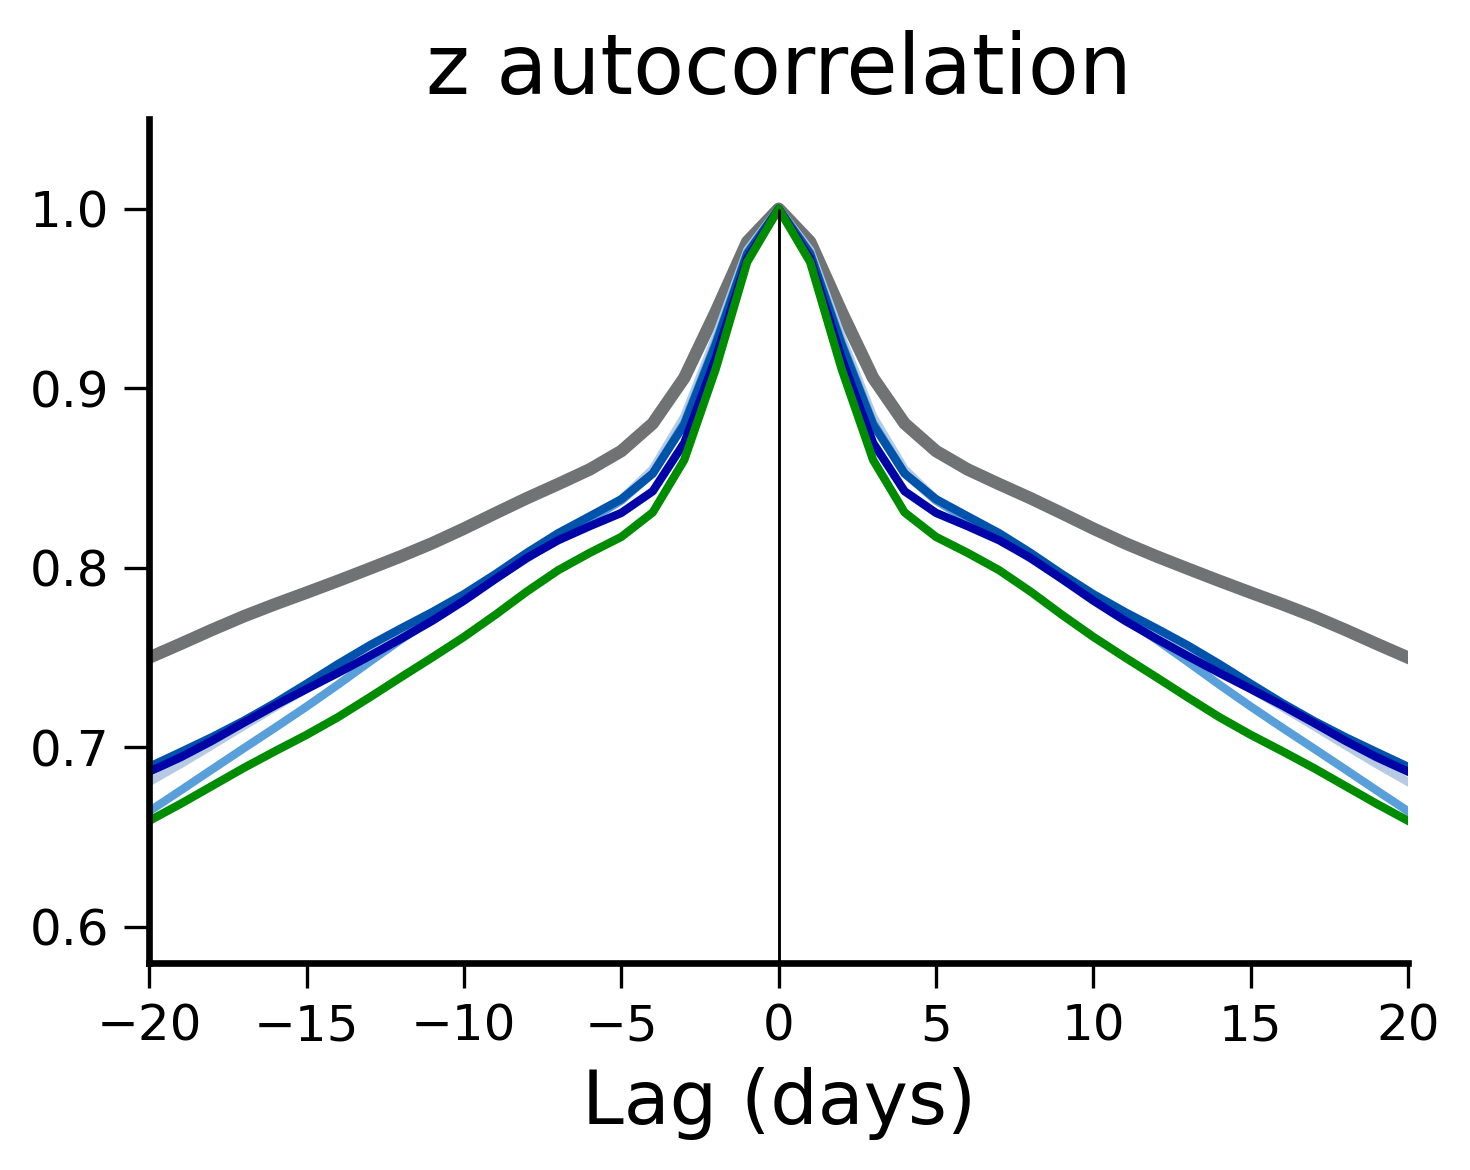

In [503]:
 # Main loop to compute cross-correlation of m and PC1 with chunking and overlap
fig, ax = plt.subplots(1, figsize=(5, 4), dpi=300)

mpl.rcParams['axes.linewidth'] = 1.6


tau = np.arange(0,auto_length,1)
tau_full = np.arange(-auto_length+1,auto_length,1)

pr_start = 0

ax.plot(tau_full, yyy_thin_full , label="L = Dry", color=colors[0], lw=3)
ax.plot(tau_full, yyy2_thin_full, label=f"L = {pr_start+0.1}", color=colors[1], lw=2)
ax.plot(tau_full, yyy3_thin_full, label=f"L = {pr_start+0.2}", color=colors[2], lw=2)
ax.plot(tau_full, yyy4_thin_full, label=f"L = {pr_start+0.3}", color=colors[3], lw=2)
ax.plot(tau_full, yyy5_thin_full, label=f"L = {pr_start+0.4}", color=colors[4], lw=2)
ax.plot(tau_full, yyy6_thin_full, label=f"L = {pr_start+0.5}", color=colors[5], lw=2)
# ax.legend(loc = "upper right", prop={'size': 8},frameon=False, ncols=3)

ax.set_xlim([-30,30])
ax.set_ylim([0.57,1.01])
# ax.set_xlabel(r"$\tau$", fontsize=12)
ax.set_xlabel("Lag (days)", fontsize=12)

# ax.set_title(r"$C_{zz}$ autocorrelation,"+"without spilting into window", fontsize=12)
ax.set_title("z autocorrelation", fontsize=20)


ax.set_xlabel("Lag (days)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Lag (days)", fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(direction='out', length=6)
ax.set_ylim([0.58, 1.05])
ax.vlines(x=0, ymin=-0.1, ymax=1, color="black", lw=0.7)

plt.xlim([-20,20])
# plt.grid()

plt.tight_layout()
plt.savefig(f"113-1Seminar_fig/visualize/autocorrelation/z.png", bbox_inches='tight', dpi=300)


plt.show()

(99.52255640222106+0j) 96.43315392628506
(84.15020075817995+0j) 85.14749575944104
(81.71319998358257+0j) 82.49009341260714
(82.84074137670696+0j) 82.06730553111386
(76.79521297503378+0j) 75.80165491165748
(67.60131205621954+0j) 67.41988089425287
$dlog(C_{z_{1}z_{1}}) / d\tau$\n
eddy feed back 60~99day
L = 0.0, 1/tau= 72.58900608474936
L = 0.1, 1/tau= 54.32887264621294
L = 0.2, 1/tau= 48.762757987000164
L = 0.3, 1/tau= 55.13045218224055
L = 0.4, 1/tau= 55.8070939129769
L = 0.5, 1/tau= 49.48658377265199


/home/PeterChang/miniconda3/envs/ML22/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/PeterChang/miniconda3/envs/ML22/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_2651872/2969057619.py:120: ComplexWarning: Casting complex values to real discards the imaginary part
  tau_z_square[aa] = spectrum_gaussian[idx_new][lg//2:lg//2+10].max()


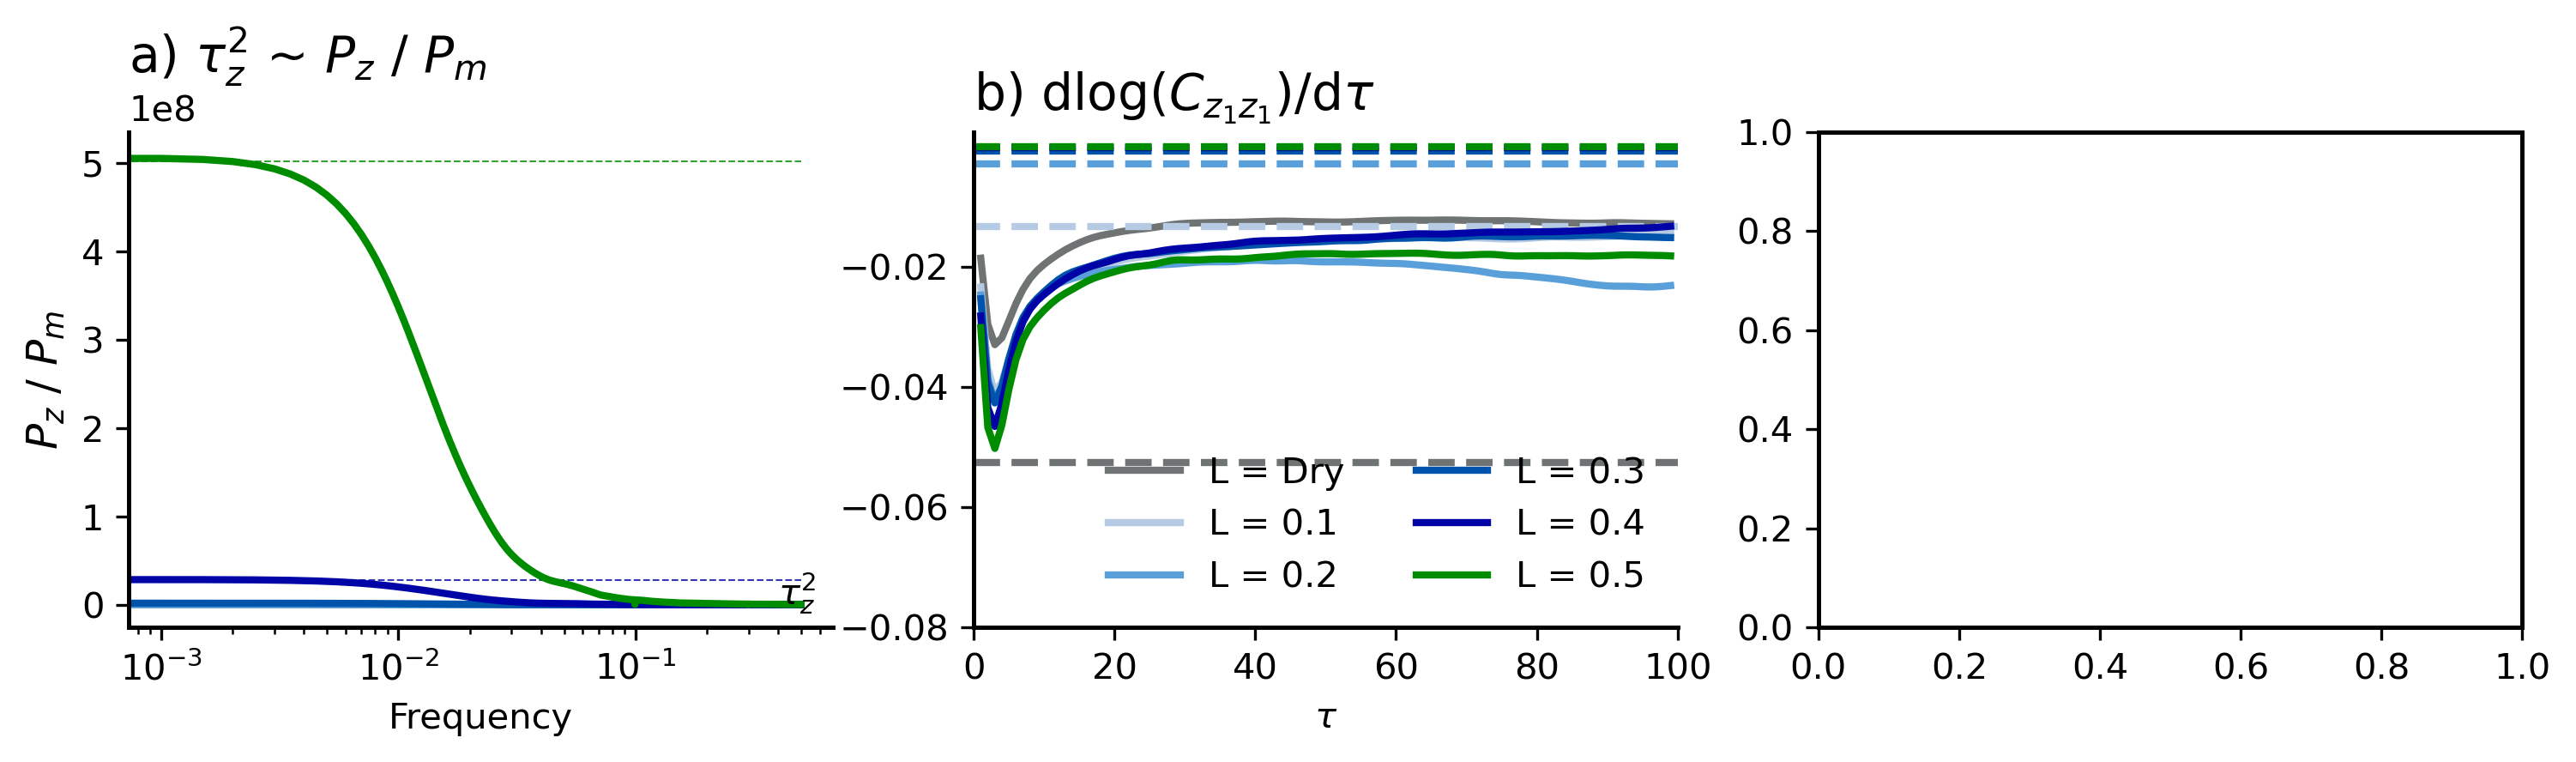

[ 0.         -0.01859441 -0.02959033 -0.03298044 -0.03183729 -0.02899772
 -0.0261414  -0.02377755 -0.02197577 -0.0206506  -0.01962214 -0.01873647
 -0.01793006 -0.01721139 -0.01658999 -0.01603957 -0.01555007 -0.01514951
 -0.01484792 -0.01460855 -0.01438587 -0.01416966 -0.01398549 -0.01384722
 -0.01372631 -0.01358483 -0.01341367 -0.01322207 -0.01303902 -0.01290052
 -0.012814   -0.01276126 -0.01272483 -0.01269514 -0.01266633 -0.01264509
 -0.01263538 -0.01262224 -0.01259578 -0.01256144 -0.01252766 -0.01249721
 -0.01246418 -0.01243628 -0.01243084 -0.01245358 -0.01248753 -0.01251369
 -0.01253025 -0.01254588 -0.01256767 -0.01258723 -0.01258792 -0.01256674
 -0.01252988 -0.0124806  -0.01242723 -0.01238087 -0.01234268 -0.01231326
 -0.0122926  -0.01227773 -0.01227269 -0.01227923 -0.01228508 -0.01227625
 -0.01225884 -0.01224679 -0.0122508  -0.0122741  -0.01230533 -0.01233477
 -0.01235764 -0.01236834 -0.01236805 -0.01236505 -0.01237061 -0.01239426
 -0.01243553 -0.01248583 -0.01253767 -0.01259005 -0

In [510]:
from EOF import EOF
from scipy.fftpack import fftfreq
from scipy.fft import fft, ifft
from scipy.ndimage import gaussian_filter1d
pr_start = 0
pr_leap = 10
pr_to = 60
total_pr = int((pr_to - pr_start) / pr_leap)

start = 500
end   = 20000
internal_day = 100
total_day = int((end -start)/internal_day) * internal_day

total_file = int((end - start) / internal_day)


num_exp = 6
num_lat = 32
EMF_w = np.zeros(dmdy.shape)
PP_all_u = np.zeros((6,19500))
m_fig3 = np.zeros((6, 19500))
# aa = 0
# for PR in [0,10,20,30,40,50]:
#     output_file = f"/data92/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/6hourly_uv_prime_EMF/Mean_6hourly_to_daily_mean/PR{PR}/u/PR{PR}_500_20000day_u_zonal_mean_daily.dat"
#     with h5py.File(output_file, "r") as u_file0:
#         Uzm[aa] = np.asarray(u_file0["u"][:,:,:])
#     aa += 1
        
u_50   = np.nanmean(Uzm_all[:,:,:,num_lat:], axis=2)
u_50_w = np.zeros(u_50.shape)

for a in range(num_exp):
    u_50_w[a,:,:] = u_50[a,:,:] * (cy[num_lat:])**0.5
    single_EOF_u  = EOF((u_50_w[a],), n_components=num_lat, field="1D")
    
    single_EOF_u.get()
    
    z_u       = (single_EOF_u.PC[0,:])
    EOF_u     = (single_EOF_u.EOF[0,:])

    EOF_u_final   = EOF_u #/ EOF_u.std() # no unit

    PP_all_u[a,:] = z_u   #* EOF_u.std() # m/s

    m_fig3[a] = np.dot(np.nanmean(dmdy[a,:,:,32:]* (cy[num_lat:])**0.5, axis=1), EOF_u_final[:]) # m/s^2

##########################################################################################################
tau_z_square = np.zeros(6)

fig, ax = plt.subplots(1,3, figsize=(12,2.5), dpi=300.)
mpl.rcParams['axes.linewidth'] = 1.2
ax[0].set_xscale("log")

# Apply FFT to each window
lg      = 2000 # length of the interval
overlap = 1000 # overlap
final  = 0
Pz_all = 0
Pm_all = 0
# Define a function for the running mean
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
for aa in range(0,6):
        test = 0
    
        m_final       = m_fig3[aa]   # m/s^2
        z_paper_final = PP_all_u[aa] # m/s    
    
        final_all  = np.zeros(lg, dtype=complex)
        n_segments = 0  # Keep track of the number of segments processed
        for i in range(0, len(z_paper_final) - lg + 1, lg - overlap):
            hanning_window = np.hanning(lg)
            Z_segment = fft(z_paper_final[i:i+lg] ) / len(hanning_window)
            M_segment = fft(m_final[i:i+lg] )       / len(hanning_window)
    
            M_star = np.conjugate(M_segment)
            Z_star = np.conjugate(Z_segment)

            Pz = Z_segment * Z_star
            Pm = M_segment * M_star
            
            # Compute the cross-spectrum
            Pz_all += Pz
            Pm_all += Pm

            test += (Z_segment).dot(np.conjugate(Z_segment).T) #/ len(hanning_window)
            n_segments += 1
        
        Pz_all /= n_segments
        Pm_all /= n_segments

        print(test/n_segments, np.var(z_paper_final))

        
        # Compute the frequencies for plotting
        ###############################################################################################################
        # No running mean
        # freq = fftfreq(lg, d=1)  # Assuming your time unit is days
        # idx = np.argsort(freq)
        # if aa ==0:
        #     ax[0].plot(freq[idx], ((Pz_all/ Pm_all)[idx]/ (86400**2)), label=f"L = Dry", color=colors[int(aa)], lw=2)
        # else:
        #     ax[0].plot(freq[idx], ((Pz_all/ Pm_all)[idx]/ (86400**2)), label=f"L = {round(aa*0.1,1)}", color=colors[int(aa)], lw=2)
    
        # print("$\u03C4_{z}^2$:", ((Pz_all/ Pm_all)[idx]/86400**2)[lg//2:lg//2+10].max())
        # tau_z_square[aa] = ((Pz_all/ Pm_all)[idx]/86400**2)[lg//2:lg//2+10].max()
        ###############################################################################################################
        window_size =  5
        tau_test      = running_mean((Pz_all/ Pm_all)/ (86400**2), window_size)
        freq_adjusted = running_mean(freq, window_size)
        # Apply Gaussian filter
        sigma = 8  # Standard deviation for Gaussian kernel
        spectrum_gaussian = gaussian_filter1d(tau_test, sigma=sigma)
        idx_new = np.argsort(freq_adjusted)

        ax[0].plot(freq_adjusted[idx_new], spectrum_gaussian[idx_new], label=f"L = Dry", color=colors[int(aa)], lw=2)
        tau_z_square[aa] = spectrum_gaussian[idx_new][lg//2:lg//2+10].max()
        ax[0].hlines(y=tau_z_square[aa], xmin=freq_adjusted[idx_new].min(), xmax=freq_adjusted[idx_new].max(), linestyle="--",lw=0.5, color=colors[int(aa)], alpha=0.8)
        

        
ax[0].set_xlabel("Frequency", fontsize=10)
ax[0].set_title(r"a) $\tau ^2 _{z}$ ~ $P_z$ / $P_m$", loc="left", fontsize=14)
ax[0].set_ylabel(r"$P_z$ / $P_m$", fontsize=12)
ax[0].text(0.4, 170, r"$\tau ^2 _{z}$")
# ax.legend(loc = 0, prop={'size': 12},frameon=False, ncols=2)

# ax.grid()
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)

# ax.axvspan(freq_adjusted[idx_new].min(),1*10**-3, 0,175, facecolor='black', alpha=0.2)
# ax.set_ylim([0,180])
# plt.savefig(r"/work/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/paper1_fig/fig3a.png", bbox_inches='tight', dpi=600.)
# plt.savefig(r"/work/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/paper1_fig_Nick_colorbar/fig3a.png", bbox_inches='tight', dpi=1200.)

# plt.show()

##################################################################
# fig, ax = plt.subplots(1, figsize=(4.5,3), dpi=300)
total_pr = int(total_pr)
length = 100
total_L_final = np.zeros(total_pr)
total_L = np.zeros((total_pr,length))
aa  = 0

take_min_day = 20
take_max_day = 40
take_len_day = int(take_max_day - take_min_day)
print(r"$dlog(C_{z_{1}z_{1}}) / d\tau$\n")
print("eddy feed back 60~99day")
for pr in range(pr_start, pr_to, pr_leap):
    for i in range(1,len(total_L[aa,:])):
        if aa == 0:
            total_L[aa,i]      = np.log(yyy_thin[i])/int(i)
        elif aa == 1:
            total_L[aa,i]      = np.log(yyy2_thin[i])/int(i)
        elif aa == 2:
            total_L[aa,i]      = np.log(yyy3_thin[i])/int(i)
        elif aa == 3:
            total_L[aa,i]      = np.log(yyy4_thin[i])/int(i)
        elif aa == 4:
            total_L[aa,i]      = np.log(yyy5_thin[i])/int(i)
        elif aa == 5:
            total_L[aa,i]      = np.log(yyy6_thin[i])/int(i)

        # if i >= 60 and i <= 99:
        if i >= take_min_day and i <= take_max_day:
            total_L_final[aa] += total_L[aa,i] 
    # total_L_final[aa] /= 40 #len(total_L[aa,:])
    total_L_final[aa] /= take_len_day #len(total_L[aa,:])
    
    if aa ==0:
        ax[1].plot(tau[1:], total_L[aa,1:] , label=f"L = Dry", color=colors[int(pr/pr_leap)], lw=2)
    else:
        ax[1].plot(tau[1:], total_L[aa,1:] , label=f"L = {round(aa*0.1,1)}", color=colors[int(pr/pr_leap)], lw=2)
    # print(f"PR={aa*10},a=", np.exp(total_L_final[aa]),"1/tau=", -1/(total_L_final[aa]) )
    print(f"L = {round(aa*0.1, 1)}, 1/tau=", -1/(total_L_final[aa]) )
    # print(-1/(tau_z_square[aa]**0.5))
    ax[1].axhline(y = -1/(tau_z_square[aa]**0.5), linestyle="--", color=colors[int(pr/pr_leap)], lw=2)
    
    
    aa += 1
# ax.set_title(r"b) dlog($C_{z_{1}z_{1}}$)/d$\tau$ and dotlines " + r"-1/$\tau_{z}$", loc="left", fontsize=14)
ax[1].set_title(r"b) dlog($C_{z_{1}z_{1}}$)/d$\tau$", loc="left", fontsize=14)


ax[1].set_xlabel(r"$\tau $", fontsize=10)
# plt.xticks(np.arange(0,length-1), np.arange(1,length), fontsize=12)
ax[1].set_xlim([0,100])
# ax.grid()
# plt.legend()
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].legend(loc = 0, prop={'size': 10},frameon=False, ncols=2)


ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

desired_latitudes  = np.arange(-0.08, 0, 0.02) #np.array([-0.08, -0.04, 0. , 0.01])  # This should be defined based on your specific needs
transformed_ticks = desired_latitudes   # Transform these latitudes so y_pr0 becomes 0


# Set the tick positions and labels on ax1
ax[1].set_yticks(transformed_ticks)
# ax[1].set_xlim([0,40])
# plt.savefig(r"/work/PeterChang/back_to_master1220/Moist_Dycore/IdealizeSpetral.jl/exp/HSt42/paper1_fig_Nick_colorbar/fig3b_dCz1z1dtau with dotlines $\tau_{z}^2$.png", bbox_inches='tight', dpi=1200.)


plt.show()

print(total_L[0])
print(total_L_final[0])



